# Data analysis + classical Time-Series/stats + Machine Learning
- classical EDA
- classical Time-Series forecasting SARIMAX Box-Jenkins methodology
- Classifying a Clustering for feature importance

In [427]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import pmdarima as pm
from pmdarima import model_selection
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from prophet import Prophet
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# EDA

In [2]:
superstore=pd.read_csv('superstoree.csv')

In [3]:
superstore.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/14,6/14/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [681]:
superstore['Category'].nunique()

3

In [682]:
superstore['Sub-Category'].nunique()

17

In [683]:
superstore['Product Name'].nunique()

1850

In [117]:
superstore['City'].nunique()

531

In [119]:
superstore['Postal Code'].nunique()

631

In [121]:
superstore['Country'].unique()


array(['United States'], dtype=object)

In [139]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [99]:
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

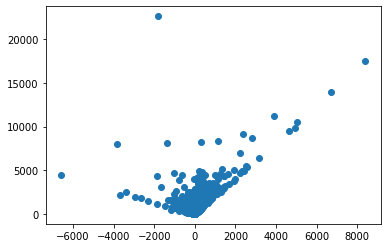

In [523]:
plt.scatter(superstore['Profit'],superstore['Sales'])

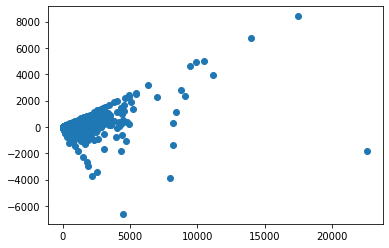

In [538]:
plt.scatter(superstore['Sales'],superstore['Profit'])

<AxesSubplot:ylabel='Frequency'>

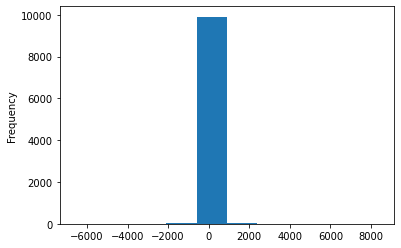

In [526]:
superstore['Profit'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

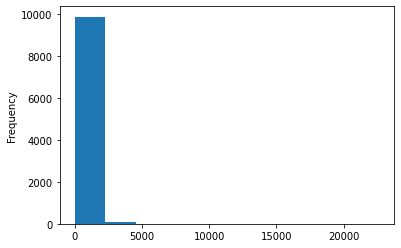

In [527]:
superstore['Sales'].plot(kind='hist')

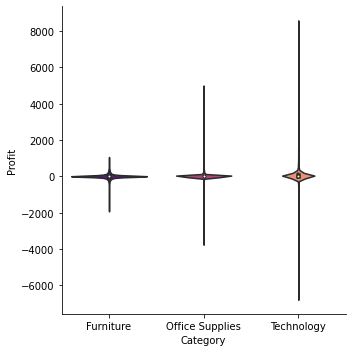

In [138]:
sns.catplot(x="Category", y="Profit",
            kind="violin", data=superstore, palette = 'magma')

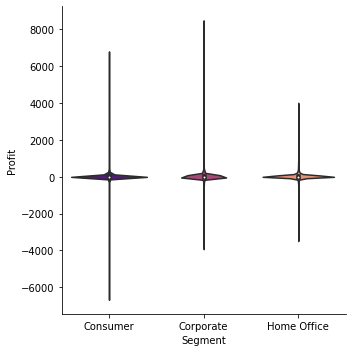

In [251]:
sns.catplot(x="Segment", y="Profit",
            kind="violin", data=superstore, palette = 'magma')

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

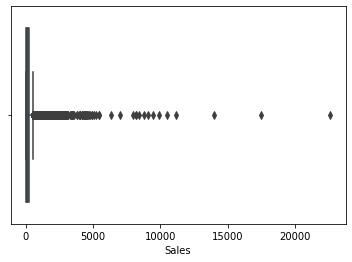

In [567]:
sns.boxplot(superstore['Sales'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

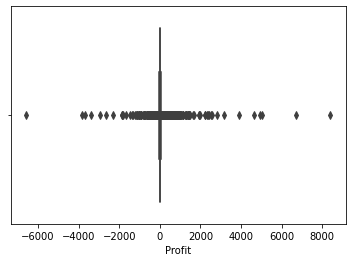

In [568]:
sns.boxplot(superstore['Profit'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

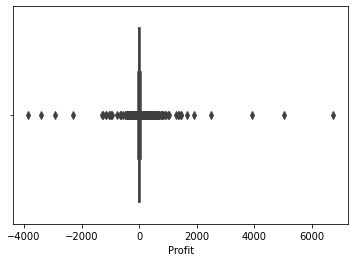

In [89]:
sns.boxplot(superstore[superstore['Order Date'].dt.year==2017]['Profit'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

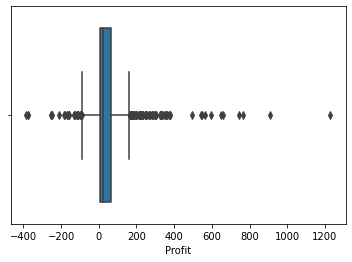

In [124]:
sns.boxplot(superstore[superstore['Sub-Category']=='Phones']['Profit'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

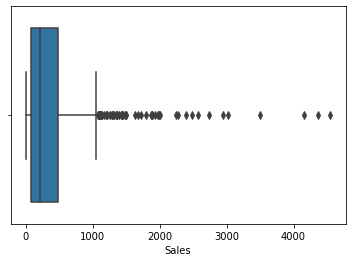

In [125]:
sns.boxplot(superstore[superstore['Sub-Category']=='Phones']['Sales'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

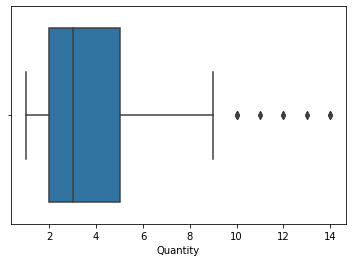

In [126]:
sns.boxplot(superstore[superstore['Sub-Category']=='Phones']['Quantity'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

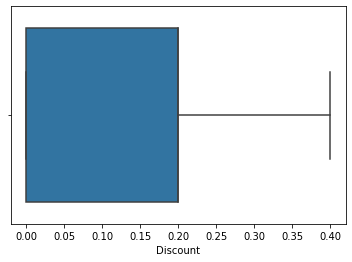

In [127]:
sns.boxplot(superstore[superstore['Sub-Category']=='Phones']['Discount'])

<AxesSubplot:xlabel='Quantity'>

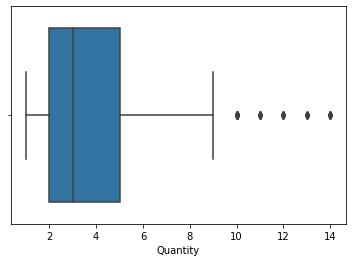

In [132]:
sns.boxplot(superstore[superstore['Category']=='Furniture']['Quantity'])

In [214]:
superstore[(superstore['Category']=='Furniture') & ( superstore['Quantity'] >=10)][['Quantity','Discount','Profit']].sort_values(by=['Discount','Profit'],ascending=False)                                                                                                                                                

,Quantity,Discount,Profit
7783,10,0.40,-292.1000
949,12,0.40,-619.5960
9639,13,0.40,-1862.3124
9484,10,0.32,-137.9760
5517,10,0.30,-10.2840
1045,14,0.30,-18.1860
4270,11,0.20,190.4298
1246,12,0.20,135.4068
8849,10,0.20,45.9540
3624,12,0.20,42.5880


In [217]:
superstore[(superstore['Category']=='Technology') & ( superstore['Quantity'] >=10)][['Quantity','Discount','Profit']].sort_values(by=['Discount','Profit'],ascending=False)       

,Quantity,Discount,Profit
5385,14,0.4,72.7888
614,10,0.4,15.9920
343,12,0.4,8.3916
4297,13,0.2,327.5922
7276,10,0.2,239.9760
8935,14,0.2,209.9790
2418,10,0.2,179.7300
1048,12,0.2,125.2692
2793,14,0.2,94.0702
9895,11,0.2,38.4560


<AxesSubplot:ylabel='Density'>

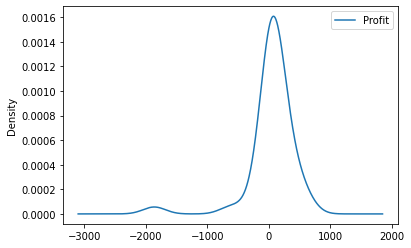

In [215]:
superstore[(superstore['Category']=='Furniture') & ( superstore['Quantity'] >=10)][['Profit']].plot(kind='kde')
# It is clear that the alot furniture bought in high quantity with a Discount is sold at a  major loss 

<AxesSubplot:ylabel='Density'>

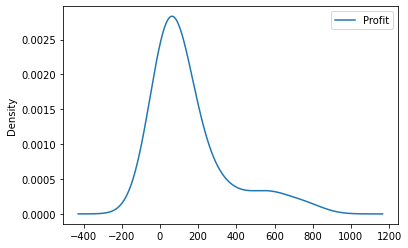

In [216]:
superstore[(superstore['Category']=='Technology') & ( superstore['Quantity'] >=10)][['Profit']].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

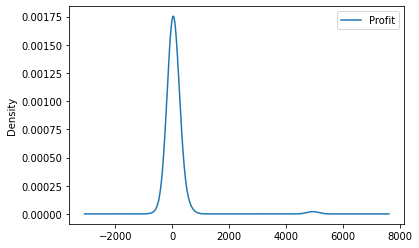

In [218]:
superstore[(superstore['Category']=='Office Supplies') & ( superstore['Quantity'] >=10)][['Profit']].plot(kind='kde')

<AxesSubplot:>

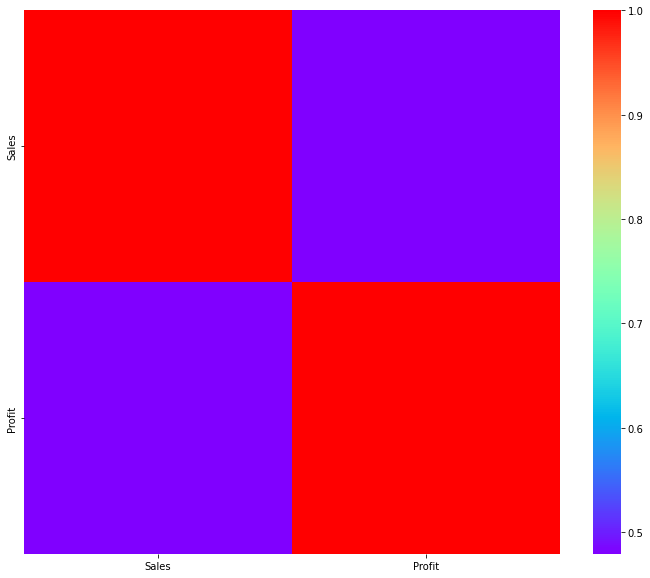

In [510]:
corr =superstore[['Sales','Profit']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='rainbow')

<AxesSubplot:>

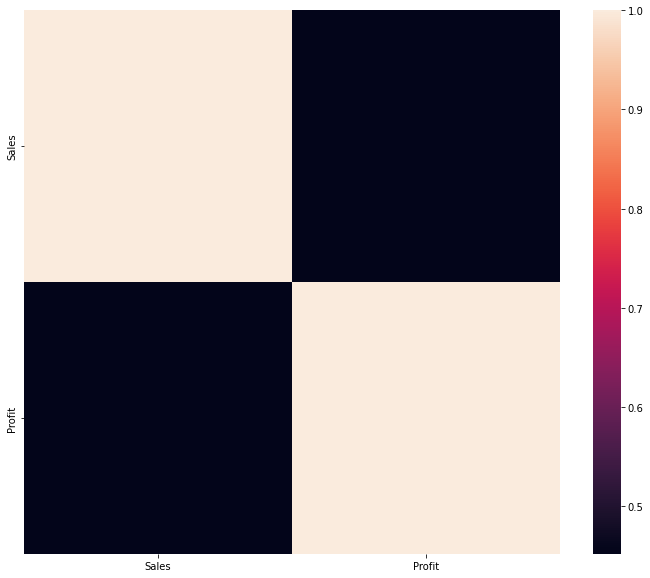

In [528]:
corrt =superstore[['Sales','Profit']].corr(method='kendall')
plt.figure(figsize=(12, 10))
sns.heatmap(corrt)

In [521]:
corr

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


In [522]:
corrt

,Sales,Profit
Sales,1.000000,0.452118
Profit,0.452118,1.000000


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

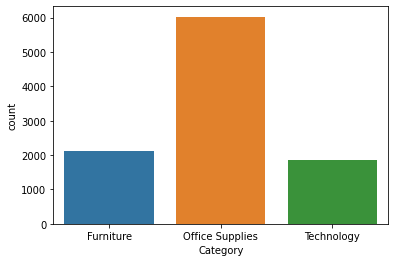

In [328]:
sns.countplot(superstore['Category'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

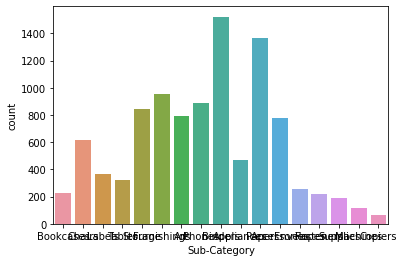

In [329]:
sns.countplot(superstore['Sub-Category'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

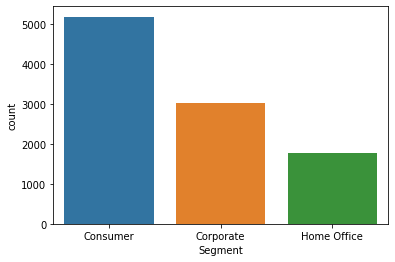

In [515]:
sns.countplot(superstore['Segment'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

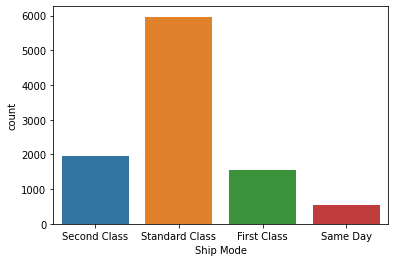

In [517]:
sns.countplot(superstore['Ship Mode'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

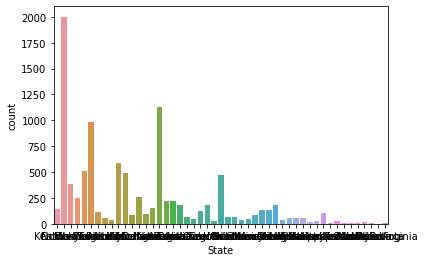

In [332]:
sns.countplot(superstore['State'])

In [4]:
superstore['Order Date']=pd.to_datetime(superstore['Order Date'])

In [5]:
superstore['Ship Date']=pd.to_datetime(superstore['Ship Date'])

In [6]:
yr=superstore['Order Date'].dt.year.sort_values(ascending=True).unique()
stringyr=['2014','2015','2016','2017'] 

# Distribution of sales over time

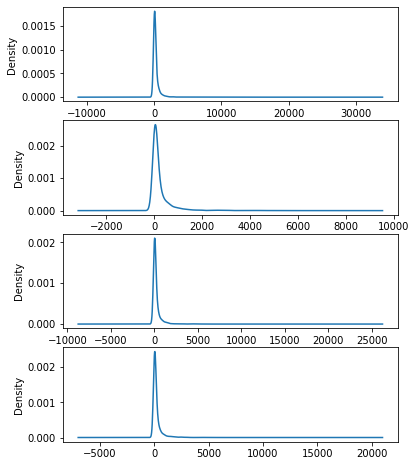

In [81]:
f, ax = plt.subplots(4,figsize=(6,8))
for f,i in enumerate(yr):
    superstore.loc[superstore['Order Date'].dt.year==i]['Sales'].plot(kind='kde',ax=ax[f])


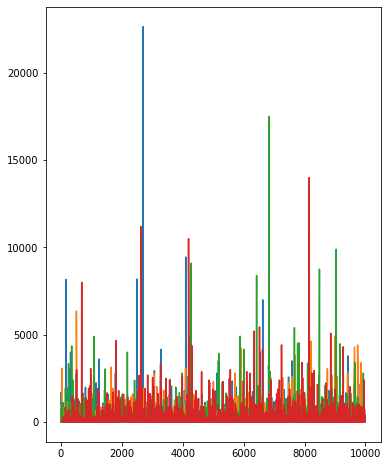

In [378]:
f, ax = plt.subplots(1,figsize=(6,8))
for f,i in enumerate(yr):
    ax.plot(superstore.loc[superstore['Order Date'].dt.year==i]['Sales'])
 

# Distribution of Profit over time

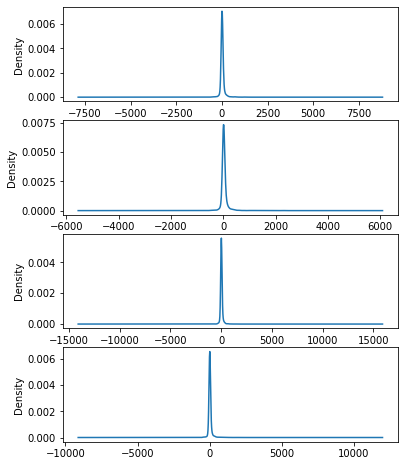

In [82]:
f, ax = plt.subplots(4,figsize=(6,8))
for f,i in enumerate(yr):
    superstore.loc[superstore['Order Date'].dt.year==i]['Profit'].plot(kind='kde',ax=ax[f])


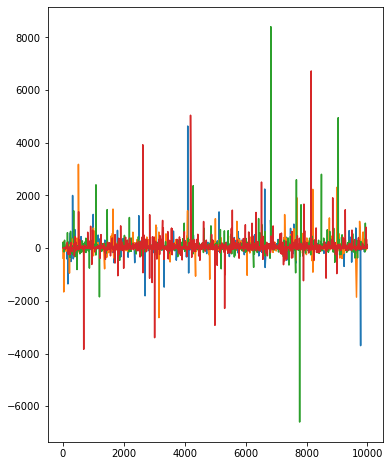

In [379]:
f, ax = plt.subplots(1,figsize=(6,8))
for f,i in enumerate(yr):
    superstore.loc[superstore['Order Date'].dt.year==i]['Profit'].plot()



# Most profitable cateogry by year

In [47]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Category')['Profit'].sum().to_frame('Profit '+stringyr[f]).reset_index().sort_values(by='Profit '+stringyr[f],ascending=False))

          Category  Profit 2014
1  Office Supplies   22593.4161
2       Technology   21492.8325
0        Furniture    5457.7255
          Category  Profit 2015
2       Technology   33503.8670
1  Office Supplies   25099.5338
0        Furniture    3015.2029
          Category  Profit 2016
2       Technology   39773.9920
1  Office Supplies   35061.2292
0        Furniture    6959.9531
          Category  Profit 2017
2       Technology   50684.2566
1  Office Supplies   39736.6217
0        Furniture    3018.3913


# Most profitable state in 2017 bar plot

<AxesSubplot:xlabel='State'>

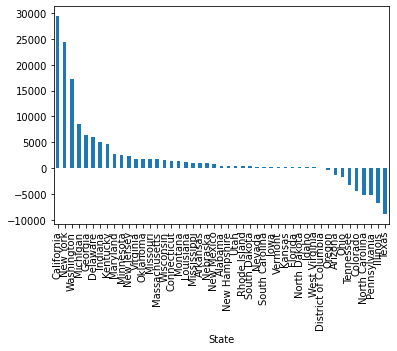

In [66]:
superstore[superstore['Order Date'].dt.year== 2017].groupby(['State'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

# Most profitable customer over years

In [68]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Customer ID')['Profit'].sum().to_frame('Profit '+stringyr[f]).reset_index().sort_values(by='Profit '+stringyr[f],ascending=False))

    Customer ID  Profit 2014
503    SC-20095    5462.5830
552    TB-21400    2567.6441
425    NM-18445    2413.8367
160    DM-13015    1599.6806
407    MW-18235    1449.5187
..          ...          ...
500    SB-20290   -1272.3412
305    KD-16270   -1340.5041
525    SM-20320   -1789.7327
69     BM-11140   -1878.7892
334    LF-17185   -3802.0806

[595 rows x 2 columns]
    Customer ID  Profit 2015
112    CM-12385    3197.4580
309    KD-16495    2810.0215
235    HM-14860    2450.9987
204    FH-14365    2139.7363
496    SD-20485    1954.7930
..          ...          ...
116    CP-12340   -1044.4553
567    VW-21775   -1186.4116
267    JH-15985   -1429.3776
534    TB-21520   -1524.0282
405    NF-18385   -1980.3794

[573 rows x 2 columns]
    Customer ID  Profit 2016
598    TC-20980    8764.9483
6      AB-10105    4747.8222
549    SE-20110    2673.7824
87     BS-11365    2405.3645
191    DR-12940    2337.7598
..          ...          ...
482    PK-18910    -807.7770
607    TN-21040    -903.

# Most profitable city over time

In [70]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('City')['Profit'].sum().to_frame('Profit '+stringyr[f]).reset_index().sort_values(by='Profit '+stringyr[f],ascending=False))

              City  Profit 2014
168  New York City   10196.1746
236        Seattle    5074.8431
154    Minneapolis    4695.1974
228  San Francisco    4293.0657
132    Los Angeles    4096.5528
..             ...          ...
193        Phoenix   -1154.4719
192   Philadelphia   -1998.6756
108   Jacksonville   -2088.2107
102        Houston   -3085.2932
226    San Antonio   -6100.8679

[268 rows x 2 columns]
              City  Profit 2015
166  New York City   17080.5117
134    Los Angeles    7169.2750
237        Seattle    5241.9425
9          Atlanta    3600.9050
242    Springfield    3139.3014
..             ...          ...
167         Newark   -1197.1455
143         Medina   -1211.5360
147          Miami   -1287.4521
53         Concord   -1727.8974
192   Philadelphia   -3773.1234

[275 rows x 2 columns]
              City  Profit 2016
186  New York City   12354.2703
153    Los Angeles    9115.6400
135      Lafayette    8789.8231
65         Detroit    7385.8329
225     Providence    42

# Most profitable subcategory

<AxesSubplot:xlabel='Sub-Category'>

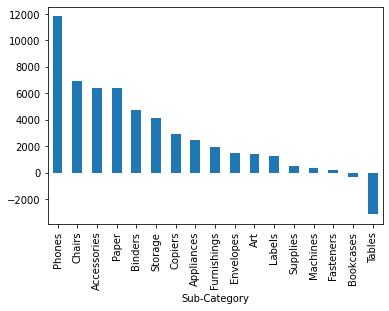

In [79]:
superstore[superstore['Order Date'].dt.year== 2014].groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

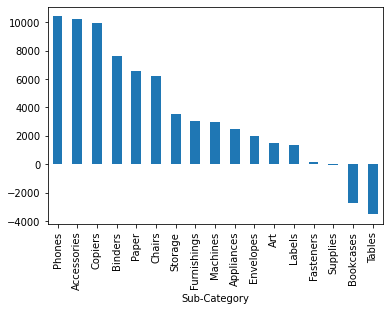

In [80]:
superstore[superstore['Order Date'].dt.year== 2015].groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

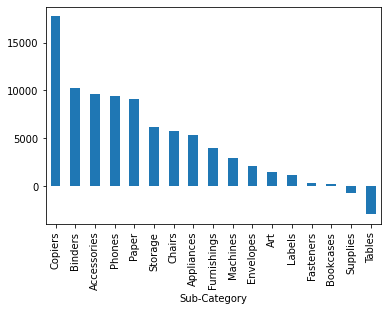

In [81]:
superstore[superstore['Order Date'].dt.year== 2016].groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

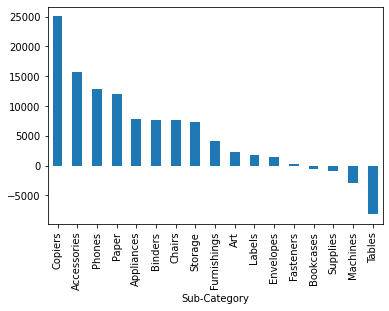

In [82]:
superstore[superstore['Order Date'].dt.year== 2017].groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

# Highest discounted item 

In [566]:
superstore.groupby('Order Date')[['Discount','Profit','Product Name']].max().reset_index().sort_values(by='Discount',ascending=False).head(100)

,Order Date,Discount,Profit,Product Name
300,2014-12-27,0.8,184.2600,Xerox 1983
436,2015-06-25,0.8,57.3580,Xerox 211
446,2015-07-09,0.8,209.2365,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ..."
193,2014-09-03,0.8,7.0560,GBC VeloBinder Strips
812,2016-09-11,0.8,751.9624,Xerox 1976
...,...,...,...,...
342,2015-03-05,0.8,67.6080,Staple holder
324,2015-02-06,0.8,266.4522,Xerox 1920
731,2016-06-11,0.8,132.5898,Wilson Jones Turn Tabs Binder Tool for Ring Bi...
1037,2017-05-28,0.8,101.4504,Xerox 230


# The sum of the discount of each customer over years

In [554]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Customer ID')['Discount'].sum().to_frame('Discount '+stringyr[f]).reset_index().sort_values(by='Discount '+stringyr[f],ascending=False))

    Customer ID  Discount 2014
334    LF-17185           4.80
177    EA-14035           4.20
501    SC-20020           3.52
276    JK-15730           3.50
112    CM-12715           3.50
..          ...            ...
251    JC-15775           0.00
146    DH-13075           0.00
145    DG-13300           0.00
492    RP-19855           0.00
475    RD-19585           0.00

[595 rows x 2 columns]
    Customer ID  Discount 2015
26     AH-10690            4.2
517    SP-20860            3.6
449    RA-19915            3.4
356    MC-18100            3.4
200    FA-14230            3.4
..          ...            ...
397    MZ-17335            0.0
401    NC-18415            0.0
404    ND-18460            0.0
406    NF-18475            0.0
0      AA-10315            0.0

[573 rows x 2 columns]
    Customer ID  Discount 2016
545    SC-20770           4.70
287    JE-15715           4.50
227    EP-13915           4.12
214    EH-13945           4.10
123    CK-12205           4.00
..          ...       

# Customer with most orders

In [488]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Customer ID')['Customer ID'].count().to_frame('customercount '+stringyr[f]).reset_index())

    Customer ID  customercount 2014
0      AA-10315                   4
1      AA-10375                   2
2      AA-10480                   1
3      AA-10645                   6
4      AB-10015                   4
..          ...                 ...
590    WB-21850                   8
591    XP-21865                  10
592    YC-21895                   3
593    ZC-21910                   5
594    ZD-21925                   3

[595 rows x 2 columns]
    Customer ID  customercount 2015
0      AA-10315                   1
1      AA-10375                   4
2      AA-10645                   3
3      AB-10060                   1
4      AB-10105                   6
..          ...                 ...
568    WB-21850                   6
569    XP-21865                   3
570    YC-21895                   1
571    YS-21880                   5
572    ZC-21910                   9

[573 rows x 2 columns]
    Customer ID  customercount 2016
0      AA-10315                   4
1      AA-10375 

# Most profitable Product

In [573]:
for f,i in enumerate(yr):
      print(superstore[superstore['Order Date'].dt.year == i].groupby('Product Name')['Profit'].sum().to_frame('Profit '+stringyr[f]).reset_index().sort_values(by='Profit '+stringyr[f],ascending=False))

                                          Product Name  Profit 2014
599               Ibico EPK-21 Electric Binding System    4630.4755
270  Canon imageCLASS MF7460 Monochrome Digital Las...    1995.9900
117                  Ativa V4110MDD Micro-Cut Shredder    1371.9804
496            Global Deluxe High-Back Manager's Chair    1369.8442
531  HP Designjet T520 Inkjet Large Format Printer ...    1294.9926
..                                                 ...          ...
998    StarTech.com 10/100 VDSL2 Ethernet Extender Kit    -759.1260
452          GBC DocuBind 300 Electric Binding Machine   -1030.9208
293  Cisco TelePresence System EX90 Videoconferenci...   -1811.0784
653          Lexmark MX611dhe Monochrome Laser Printer   -1869.9890
454          GBC DocuBind P400 Electric Binding System   -2640.3206

[1212 rows x 2 columns]
                                           Product Name  Profit 2015
424   Fellowes PB500 Electric Punch Plastic Comb Bin...    7498.8410
1236                 

# Highest quantity  product ordered

In [572]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Product Name')['Quantity'].max().reset_index().sort_values(by='Quantity',ascending=False))

                                          Product Name  Quantity
867                                      Pyle PMP37LED        14
784           OIC Colored Binder Clips, Assorted Sizes        14
970                Southworth 100% Résumé Paper, 24lb.        14
996                            Staples in misc. colors        14
545                  High-Back Leather Manager's Chair        14
..                                                 ...       ...
364  Eldon Advantage Chair Mats for Low to Medium P...         1
363            Eldon 200 Class Desk Accessories, Smoke         1
252  Bravo II Megaboss 12-Amp Hard Body Upright, Re...         1
62                 Accohide Poly Flexible Ring Binders         1
305                       Computer Printout Index Tabs         1

[1212 rows x 2 columns]
                                           Product Name  Quantity
830         Personal Creations Ink Jet Cards and Labels        14
379   Eldon ProFile File 'N Store Portable File Tub ...        

# Most profitable region over time

In [543]:
for f,i in enumerate(yr):
    print(superstore[superstore['Order Date'].dt.year == i].groupby('Region')['Profit'].sum().to_frame('Profit '+stringyr[f]).reset_index().sort_values(by='Profit '+stringyr[f],ascending=False))

    Region  Profit 2014
3     West   20065.6912
1     East   17059.6095
2    South   11879.1200
0  Central     539.5534
    Region  Profit 2015
1     East   21091.0130
3     West   20492.1947
0  Central   11716.8020
2    South    8318.5940
    Region  Profit 2016
3     West   24051.6069
1     East   20141.5961
0  Central   19899.1629
2    South   17702.8084
    Region  Profit 2017
3     West   43808.9561
1     East   33230.5614
2    South    8848.9079
0  Central    7550.8442


# Why is Texas losing money overall?
- The Discount dist. indicates the average discount is 0 in NY and 0.2 in TX 
- The second modal point in dist. peaks are larger in TX also
- it is clear alot of items are sold at a loss in TX namely office supplies
- A similar investigation can be done for other states

<AxesSubplot:ylabel='Density'>

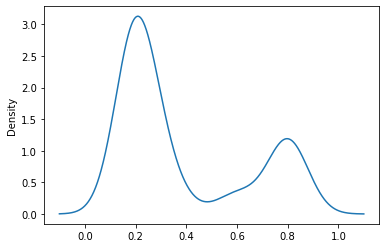

In [262]:
superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='Texas')]['Discount'].plot(kind='kde') 

<AxesSubplot:ylabel='Density'>

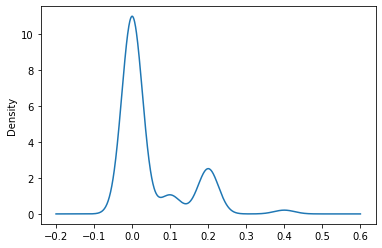

In [263]:
superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='New York')]['Discount'].plot(kind='kde') # bimodal 

In [275]:
superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='Texas') & (superstore['Sub-Category']=='Tables')].sort_values(by=['Discount'],ascending=False).head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,clusters
3438,3439,CA-2017-152583,2017-10-30,2017-10-30,Same Day,RA-19945,Ryan Akin,Consumer,United States,Dallas,...,Central,FUR-TA-10002041,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",251.006,2,0.3,-68.1302,0
3614,3615,CA-2017-112529,2017-11-19,2017-11-21,First Class,SC-20770,Stewart Carmichael,Corporate,United States,San Antonio,...,Central,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",718.116,6,0.3,-71.8116,0
6438,6439,US-2017-113992,2017-12-14,2017-12-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Plano,...,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,974.988,4,0.3,-97.4988,0
7493,7494,US-2017-160836,2017-09-11,2017-09-16,Standard Class,CC-12475,Cindy Chapman,Consumer,United States,Houston,...,Central,FUR-TA-10002855,Furniture,Tables,Bevis Round Conference Table Top & Single Colu...,512.190,5,0.3,-65.8530,0
7844,7845,US-2017-123834,2017-07-21,2017-07-25,Standard Class,GM-14500,Gene McClure,Consumer,United States,Pharr,...,Central,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,124.404,4,0.3,-21.3264,0
7929,7930,CA-2017-167549,2017-07-25,2017-07-27,First Class,EM-14200,Evan Minnotte,Home Office,United States,Dallas,...,Central,FUR-TA-10004767,Furniture,Tables,Safco Drafting Table,298.116,6,0.3,-4.2588,0
8362,8363,CA-2017-147207,2017-01-02,2017-01-04,Second Class,TS-21655,Trudy Schmidt,Consumer,United States,El Paso,...,Central,FUR-TA-10002958,Furniture,Tables,"Bevis Oval Conference Table, Walnut",913.430,5,0.3,-169.6370,0
8412,8413,CA-2017-132290,2017-03-10,2017-03-14,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Dallas,...,Central,FUR-TA-10002228,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",933.408,4,0.3,-173.3472,0
8677,8678,CA-2017-141705,2017-10-24,2017-10-26,First Class,PO-18850,Patrick O'Brill,Consumer,United States,Mansfield,...,Central,FUR-TA-10004607,Furniture,Tables,Hon 2111 Invitation Series Straight Table,517.405,5,0.3,-81.3065,0
8976,8977,CA-2017-156622,2017-11-23,2017-11-26,First Class,JP-15460,Jennifer Patt,Corporate,United States,Dallas,...,Central,FUR-TA-10003008,Furniture,Tables,"Lesro Round Back Collection Coffee Table, End ...",127.785,1,0.3,-31.0335,0


In [442]:
superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='Texas') & (superstore['Sub-Category']=='Binders')].sort_values(by=['Discount'],ascending=False).head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,clusters
75,76,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,0
679,680,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,United States,Tyler,...,Central,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,182.994,3,0.8,-320.2395,0
5242,5243,CA-2017-146367,2017-08-04,2017-08-08,Standard Class,HM-14860,Harry Marie,Corporate,United States,Carrollton,...,Central,OFF-BI-10002827,Office Supplies,Binders,Avery Durable Poly Binders,3.318,3,0.8,-5.6406,0
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,3
6193,6194,CA-2017-104927,2017-12-22,2017-12-26,Standard Class,AG-10330,Alex Grayson,Consumer,United States,Houston,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",6.330,5,0.8,-9.8115,0
6383,6384,US-2017-104661,2017-01-15,2017-01-18,First Class,TB-21250,Tim Brockman,Consumer,United States,Austin,...,Central,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",32.784,4,0.8,-52.4544,0
6386,6387,US-2017-104661,2017-01-15,2017-01-18,First Class,TB-21250,Tim Brockman,Consumer,United States,Austin,...,Central,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,4.276,1,0.8,-6.6278,0
6566,6567,CA-2017-131282,2017-02-05,2017-02-08,Second Class,CB-12025,Cassandra Brandow,Consumer,United States,Waco,...,Central,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,243.992,4,0.8,-426.9860,0
6648,6649,US-2017-124779,2017-09-08,2017-09-11,First Class,BF-11020,Barry Französisch,Corporate,United States,Arlington,...,Central,OFF-BI-10002429,Office Supplies,Binders,"Premier Elliptical Ring Binder, Black",42.616,7,0.8,-68.1856,0
7451,7452,CA-2017-105669,2017-09-17,2017-09-22,Second Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Houston,...,Central,OFF-BI-10002412,Office Supplies,Binders,Wilson Jones “Snap” Scratch Pad Binder Tool fo...,5.800,5,0.8,-10.1500,0


<AxesSubplot:xlabel='Category', ylabel='count'>

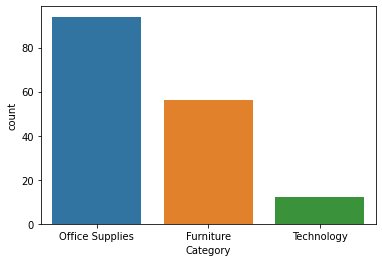

In [438]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='Texas') & (superstore['Profit'] < 0)]['Category'],orient="v")

<AxesSubplot:xlabel='Category', ylabel='count'>

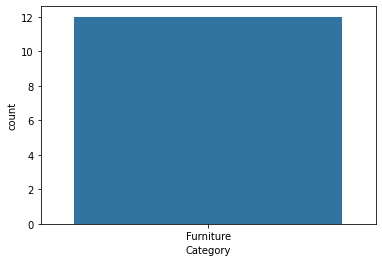

In [437]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='New York') & (superstore['Profit'] < 0)]['Category'],orient="v")

<AxesSubplot:xlabel='Category', ylabel='count'>

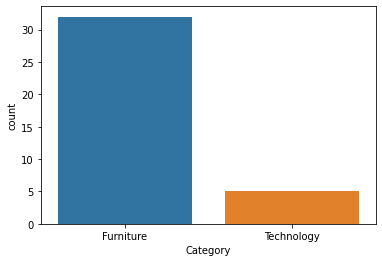

In [440]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='California') & (superstore['Profit'] < 0)]['Category'],orient="v")

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

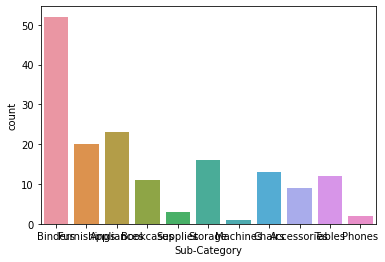

In [443]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='Texas') & (superstore['Profit'] < 0)]['Sub-Category'],orient="v")
# the most sold item is always sold at loss hence Texas store is not profitable in 2017

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

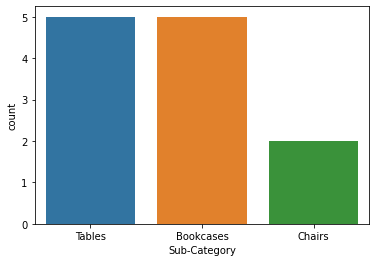

In [439]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='New York') & (superstore['Profit'] < 0)]['Sub-Category'],orient="v")

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

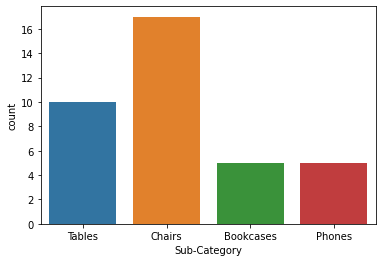

In [441]:
sns.countplot(x=superstore[(superstore['Order Date'].dt.year==2017) & (superstore['State']=='California') & (superstore['Profit'] < 0)]['Sub-Category'],orient="v")

# Time-Series cook book
- Undergoes a stricer procedure than Gauss-Markov for OLS known as Box-Jenkins terminology
- Phone and accessory monthly profit data is averaged which we use as our time-series
- Also I consider monthly sales furniture data in case
# Hypothesis tests used in Box Jenkins methodology
- Dickey Fuller, KPSS(Stationarity existence of unit root)
- Shapiro Wilk(Normality of resid)
- Bruesch Pagan(Heteroskedascity of resid)
- Ljung box( PACF, ACF plot)( serial correlation of residuals @ particular lags)
# Techniques to prevent overfitting
- Stepwise search AIC
- Rolling Cross validation ( strategic partiton of training and testing data sets OVER time)
# Empowering Forecasting with stats
- Transform signal using Kalman Filter/matrix profile leverage advanages of each method
- Outlier detection advanced ML(isolation forest, autoencoder)
- Prediction interval assuming particular dist
- Decipher which type: Type 1: Global Outliers (aka Point Anomalies), Type 2: Contextual Outliers (aka Conditional Anomalies) and Type 3: Collective Outliers.

# Some maths
 An additive SARIMAX model with order (p,i,q,P,I,Q,m) is given by
$$ \hat{Y}_{t} = \hat{C}_{t} + \hat{T}_{t} + \hat{N}_{t}  $$
$$ \hat{C}_{t} = \hat{\omega}_{0} + \sum \limits _{t=1} ^{T} (\hat{Y}_{t-m} - \hat{Y}_{t-p})\hat{A}_{p} + \sum \limits _{t=1} ^{T} (\hat{\epsilon}_{t-m} - \hat{\epsilon}_{t-q})^{2}\hat{B}_{q} $$
$$ \hat{T}_{t} = c t_{t} + d $$ 
After removing the Cyclical and Trend component the classical ARIMA model is left over as such
$$\hat{Y}_{t} = \hat{\beta}_{0} + \sum \limits _{i=1} ^{T} \hat{Y}_{t-p}\hat{\alpha}_{p} + \sum \limits _{j=1} ^{T} \epsilon^{2}_{t-q}\hat{\beta}_{q} $$

In [7]:
phones=superstore[superstore['Sub-Category']=='Phones'][['Order Date','Profit']]
accessories=superstore[superstore['Sub-Category']=='Accessories'][['Order Date','Profit']]


In [8]:
phones=phones.groupby('Order Date').sum().reset_index()
accessories=accessories.groupby('Order Date').sum().reset_index()


In [9]:
phones.index=phones['Order Date']
accessories.index=accessories['Order Date']

<AxesSubplot:xlabel='Order Date'>

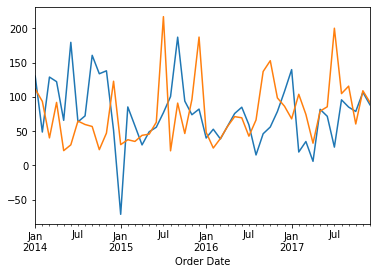

In [338]:
# using the .resample from pandas allows us to group monthly data for subcategories phones and accessories the top 2 
yp= phones['Profit'].resample('MS').mean()
ya= accessories['Profit'].resample('MS').mean()
yp.plot()
ya.plot()

<AxesSubplot:xlabel='Order Date'>

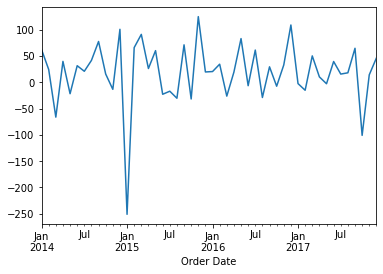

In [339]:
fur = superstore.loc[superstore['Category'] == 'Furniture']
fur = fur.groupby('Order Date')['Profit'].sum().reset_index()
fur = fur.set_index('Order Date')
fur.index
yf=fur['Profit'].resample('MS').mean()
yf.plot()


<AxesSubplot:xlabel='Order Date'>

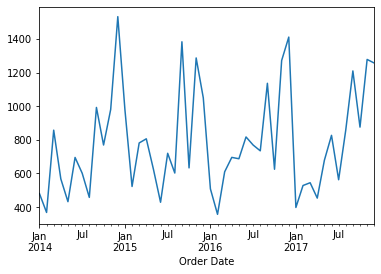

In [340]:
fur2 = superstore.loc[superstore['Category'] == 'Furniture']
fur2 = fur2.groupby('Order Date')['Sales'].sum().reset_index()
fur2 = fur2.set_index('Order Date')
fur2.index
yfs=fur2['Sales'].resample('MS').mean()
yfs.plot()



<AxesSubplot:xlabel='Order Date'>

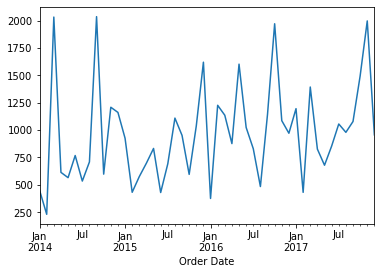

In [341]:
tech = superstore.loc[superstore['Category'] == 'Technology']
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.set_index('Order Date')
tech.index
yftech=tech['Sales'].resample('MS').mean()
yftech.plot()

<AxesSubplot:xlabel='Order Date'>

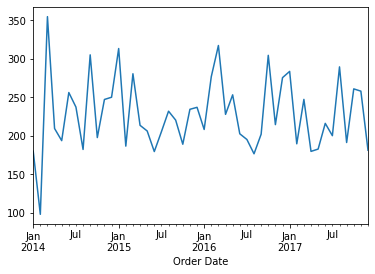

In [342]:

overall = superstore.groupby('Order Date')['Sales'].sum().reset_index()
overall = superstore.set_index('Order Date')
overall.index
overall=overall['Sales'].resample('MS').mean()
overall.plot()

In [146]:
# Easier to build this class for organizational reasons
class preprocessing():
    def __init__(self,y):
        self.y=y
    def seasonality(self):
        
        decomposition = sm.tsa.seasonal_decompose(self.y, model='additive')
        fig = decomposition.plot()
        plt.show()
    def removecycandtrend(self):
        decomposition = sm.tsa.seasonal_decompose(self.y, model='additive')
        self.y = self.y - decomposition.seasonal
        self.y = self.y -  decomposition.trend
        return self.y
    def acfandpacf(self,I):
        if I> 0:
            for i in range(0,I):
                diff=np.diff(self.y)
            sm.tsa.graphics.plot_acf(diff)
            sm.tsa.graphics.plot_pacf(diff)
        
        else:
            sm.tsa.graphics.plot_acf(self.y)
            sm.tsa.graphics.plot_pacf(self.y)
    
    def stationarity(self,I):
        if I> 0:
            for i in range(0,I):
                diff=np.diff(self.y)    
                pvalue=(adfuller(diff)[1])
                if  pvalue <= 0.05:
                    print("Stationary with p-value {}".format(pvalue))
        
                else:
                    print("Non-Stationary with p-value {}".format(pvalue))
        else:
            
            pvalue=(adfuller(self.y)[1])
            if  pvalue <= 0.05:
                print("Stationary with p-value {}".format(pvalue))
        
            else:
                print("Non-Stationary with p-value {}".format(pvalue))
        
    

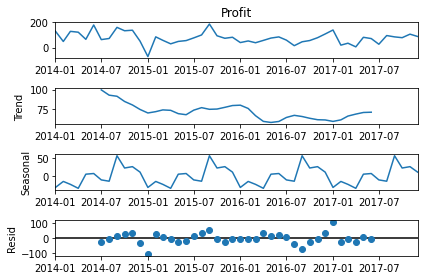

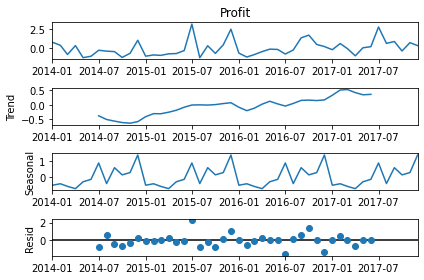

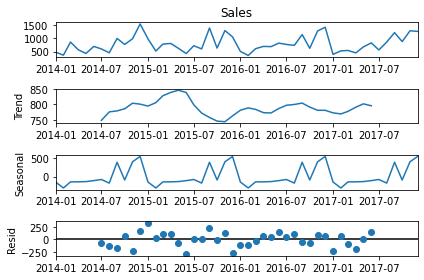

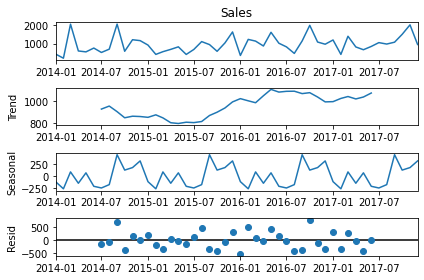

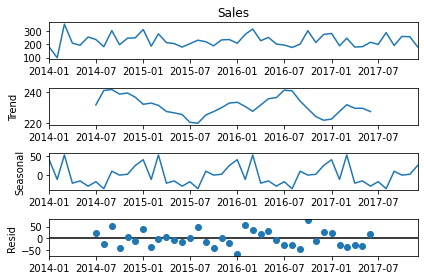

In [334]:
prep=preprocessing(yp)
prea=preprocessing(ya)
preyyfs=preprocessing(yfs)
preyyftech=preprocessing(yftech)
preoverall=preprocessing(overall)
prep.seasonality()
prea.seasonality()
preyyfs.seasonality()
preyyftech.seasonality()
preoverall.seasonality()




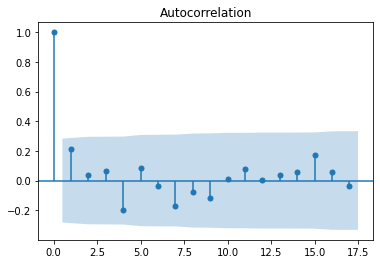

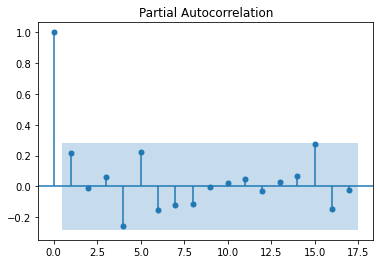

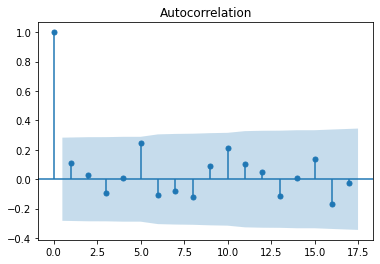

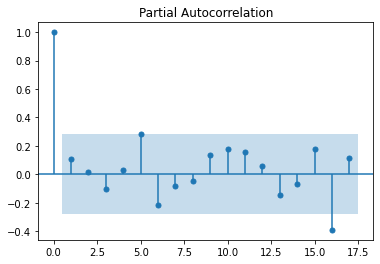

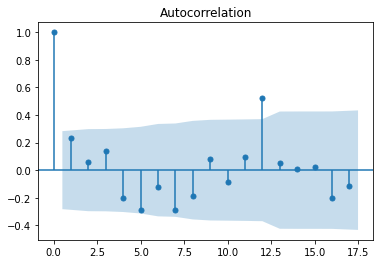

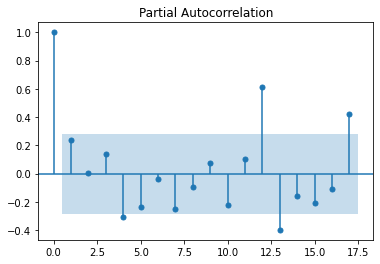

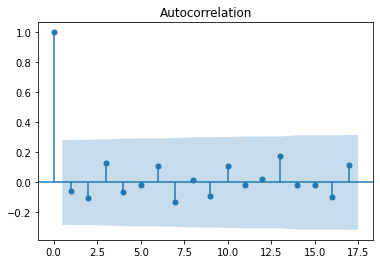

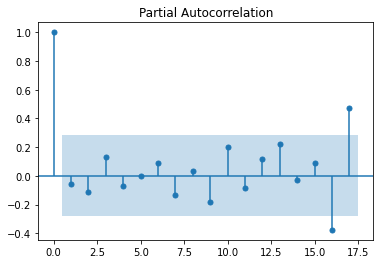

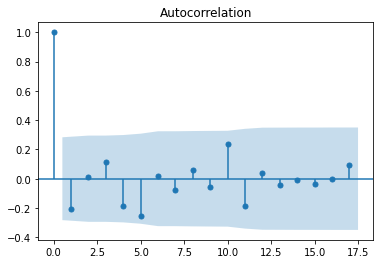

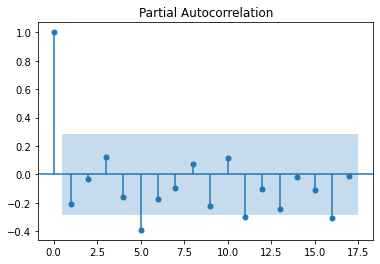

In [335]:
prep.acfandpacf(0)
prea.acfandpacf(0)
preyyfs.acfandpacf(0)
preyyftech.acfandpacf(0)
preoverall.acfandpacf(0)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


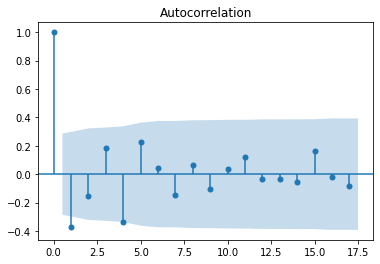

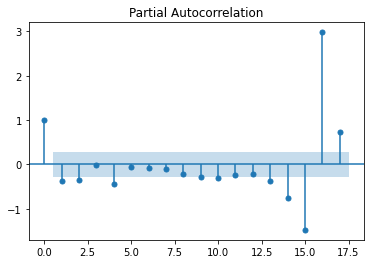

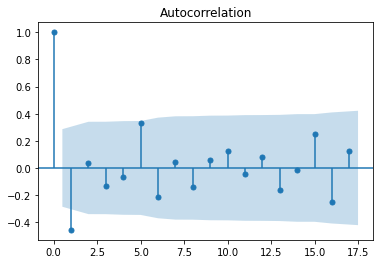

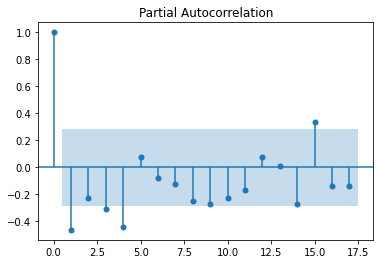

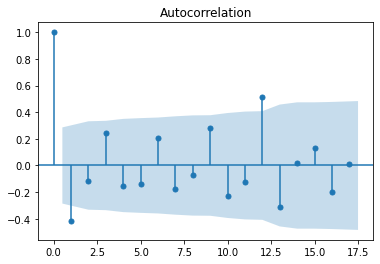

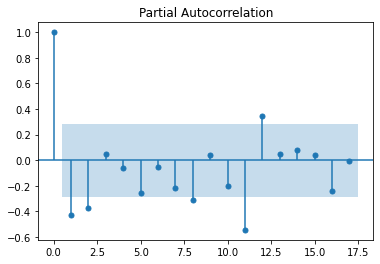

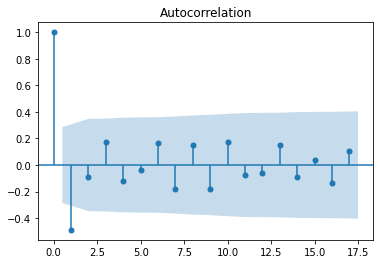

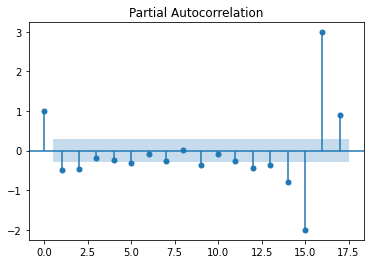

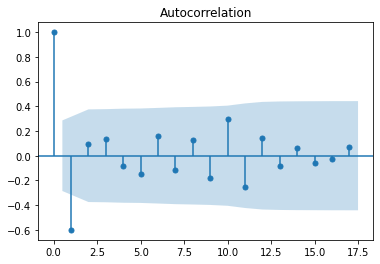

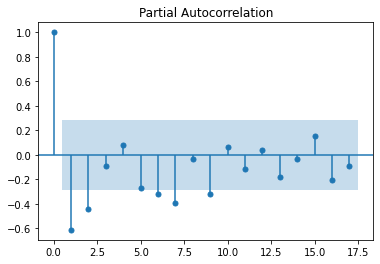

In [336]:
prep.acfandpacf(1)
prea.acfandpacf(1)

preyyfs.acfandpacf(1)
preyyftech.acfandpacf(1)


preoverall.acfandpacf(1) 

In [337]:
prep.stationarity(0)
prea.stationarity(0)

preyyfs.stationarity(0)
preyyftech.stationarity(0)

preoverall.stationarity(0)

Stationary with p-value 2.158722030920123e-06
Stationary with p-value 1.2743076680759205e-07
Stationary with p-value 9.16875665566545e-06
Stationary with p-value 2.547333596027393e-10
Stationary with p-value 0.0154897201910976


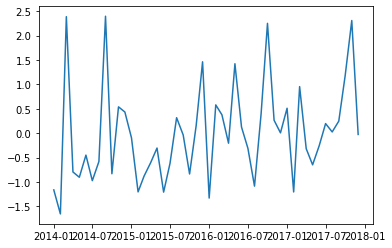

In [344]:
#sc=StandardScaler()
#yp=sc.fit_transform(yp.values.reshape(-1,1))
#ya=sc.fit_transform(ya.values.reshape(-1,1))
#yf=sc.fit_transform(yf.values.reshape(-1,1))
#yp=(yp-np.mean(yp))/np.std(yp)
ya=(ya-np.mean(ya))/np.std(ya)
yf=(yf-np.mean(yf))/np.std(yf)
yfs=(yfs-np.mean(yfs))/np.std(yfs)
yftech=(yftech-np.mean(yftech))/np.std(yftech)
yfoverall=(overall-np.mean(overall))/np.std(overall)
plt.plot(yftech)


In [346]:
xp=np.arange(0,yp.shape[0])
xa=np.arange(0,ya.shape[0])
xf=np.arange(0,yf.shape[0])
xfs=np.arange(0,yfs.shape[0])
xftech=np.arange(0,yftech.shape[0])
xoverall=np.arange(0,yftech.shape[0])
X_trainp, X_testp,y_trainp, y_testp= train_test_split(xp,yp)
X_traina,X_testa, y_traina, y_testa= train_test_split(xa,ya)
X_trainf, X_testf, y_trainf,y_testf= train_test_split(xf,yf)
X_trainfs,X_testfs, y_trainfs,y_testfs= train_test_split(xfs,yfs)
X_trainftech,X_testftech, y_trainftech,y_testftech= train_test_split(xftech,yftech)
X_trainoverall,X_testoverall, y_trainoverall,y_testoverall= train_test_split(xoverall,yfoverall)



In [165]:
y_trainftech.shape[0]


36

In [168]:
automodeltech=auto_arima(y_trainftech, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=0, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
predictionstech,conf_inttech = automodeltech.predict(n_periods=13,return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=132.628, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=130.646, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=130.629, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=134.603, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=134.601, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=128.725, Time=0.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=130.630, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=119.154, Time=0.01 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=121.125, Time=0.04 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=121.119, Time=0.03 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, T

In [181]:
automodel=auto_arima(yfs[0:36], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=0, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
predictions,conf_int = automodel.predict(n_periods=13,return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=117.131, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=102.968, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=102.961, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=115.311, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=109.503, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=106.042, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 AR

In [348]:
automodelov=auto_arima(yfoverall, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=0, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
predictionsov,conf_intov = automodelov.predict(n_periods=13,return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=178.869, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=160.822, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=176.869, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=158.844, Time=0.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=160.831, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=150.113, Time=0.02 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=152.078, Time=0.04 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=152.090, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=153.652, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=152.034, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=152.055, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=in

In [172]:
automodelcvt=auto_arima((yftech[0:36]), start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
cvt = model_selection.SlidingWindowForecastCV(window_size=3, step=1, h=1)
predictionscvt= model_selection.cross_val_predict(
automodelcvt, (yftech[36:48]), cv=cvt, verbose=2, averaging="median")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=133.225, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=125.811, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=131.242, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=117.286, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=117.495, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=115.437, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=123.882, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=115.725, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=111.421, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=111.048, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=109.440, Time=0.01 se

In [384]:
automodelcv=auto_arima((yfs[0:36]), start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
cv = model_selection.SlidingWindowForecastCV(window_size=3, step=1, h=1)
predictionscv = model_selection.cross_val_predict(
automodelcv, (yfs[36:48]), cv=cv, verbose=2, averaging="median")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=117.131, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=111.207, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=115.311, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=110.126, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=112.116, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=112.114, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=108.700, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=109.678, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=110.698, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=110.698, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=107.459, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=106.399, Time=0.0

In [381]:
automodelcvov=auto_arima(((yfoverall[0:36])), start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
cvov = model_selection.SlidingWindowForecastCV(window_size=3, step=1, h=1)
predictionscvov = model_selection.cross_val_predict(
automodelcvov, (yfoverall[36:48]), cv=cvov, verbose=2, averaging="median")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=137.513, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122.850, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=135.557, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=117.810, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=118.796, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=116.111, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=121.071, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=117.110, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best mode

In [190]:
automodel2=auto_arima(y_traina, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=0, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
predictions2,conf_int2 = automodel2.predict(n_periods=12,return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=112.959, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=119.785, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=120.729, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=112.661, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=117.804, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=110.715, Time=0.01 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=112.655, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=111.403, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=119.219, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=112.567, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=108.769, Time=0.01 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=110.705, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=110.711, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[12]             

In [169]:
automodeltech.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -52.286
Date:                Tue, 06 Sep 2022   AIC                            112.572
Time:                        23:10:05   BIC                            118.794
Sample:                             0   HQIC                           114.720
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0703      0.241     -0.291      0.771      -0.543       0.403
ar.L2         -0.2606      0.241     -1.083      0.279      -0.732       0.211
ma.L1         -0.9014      0.187     -4.809      0.000      -1.269      -0.534
sigma2         1.0877      0.241      4.509      0.000       0.615       1.561
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.43
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               0.84   Skew:                             1.01
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
automodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                 -40.971
Date:                             Tue, 06 Sep 2022   AIC                             89.942
Time:                                     23:19:30   BIC                             96.163
Sample:                                          0   HQIC                            92.089
                                              - 36                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9651      0.052    -18.555      0.000      -1.067      -0.863
ar.S.L12       0.1727      0.147      1.173      0.241      -0.116       0.461
ar.S.L24       0.7303      0.200      3.660      0.000       0.339       1.121
sigma2         0.2899      0.183      1.588      0.112      -0.068       0.648
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.64   Prob(JB):                         0.78
Heteroskedasticity (H):               0.64   Skew:                             0.26
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [349]:
automodelov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -71.096
Date:                Wed, 07 Sep 2022   AIC                            148.192
Time:                        14:02:05   BIC                            153.742
Sample:                             0   HQIC                           150.281
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9171      0.147     -6.256      0.000      -1.204      -0.630
ar.L2         -0.5334      0.136     -3.927      0.000      -0.800      -0.267
sigma2         1.1780      0.232      5.074      0.000       0.723       1.633
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.10
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.00
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [470]:
automodel2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -51.337
Date:                Thu, 01 Sep 2022   AIC                            108.675
Time:                        19:56:26   BIC                            113.341
Sample:                             0   HQIC                           110.285
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3858      0.207     -1.860      0.063      -0.792       0.021
ma.L1         -0.9364      0.150     -6.256      0.000      -1.230      -0.643
sigma2         1.0140      0.219      4.634      0.000       0.585       1.443
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.35
Prob(Q):                              0.89   Prob(JB):                         0.01
Heteroskedasticity (H):               1.76   Skew:                             1.09
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Tech Sales aggregated monthly')

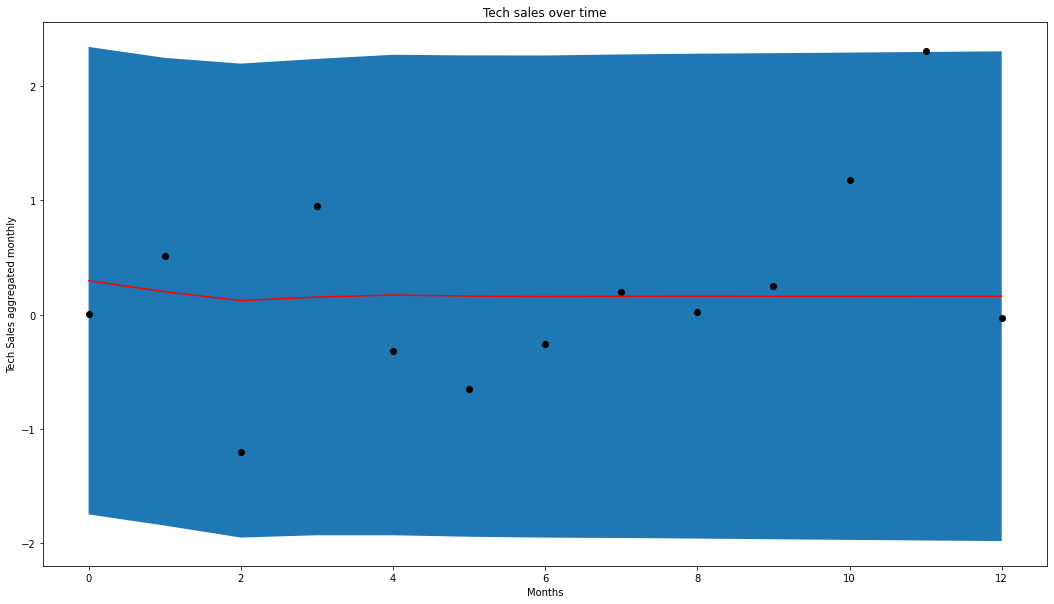

In [356]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,13),predictionstech,c='r')
plt.fill_between(np.arange(0,13),conf_inttech[:,0],conf_inttech[:,1])
plt.scatter(np.arange(0,13),yftech[35:48],c='0')
plt.title('Tech sales over time')
plt.xlabel('Months')
plt.ylabel('Tech Sales aggregated monthly')

Text(0, 0.5, 'Furniture aggregated monthly')

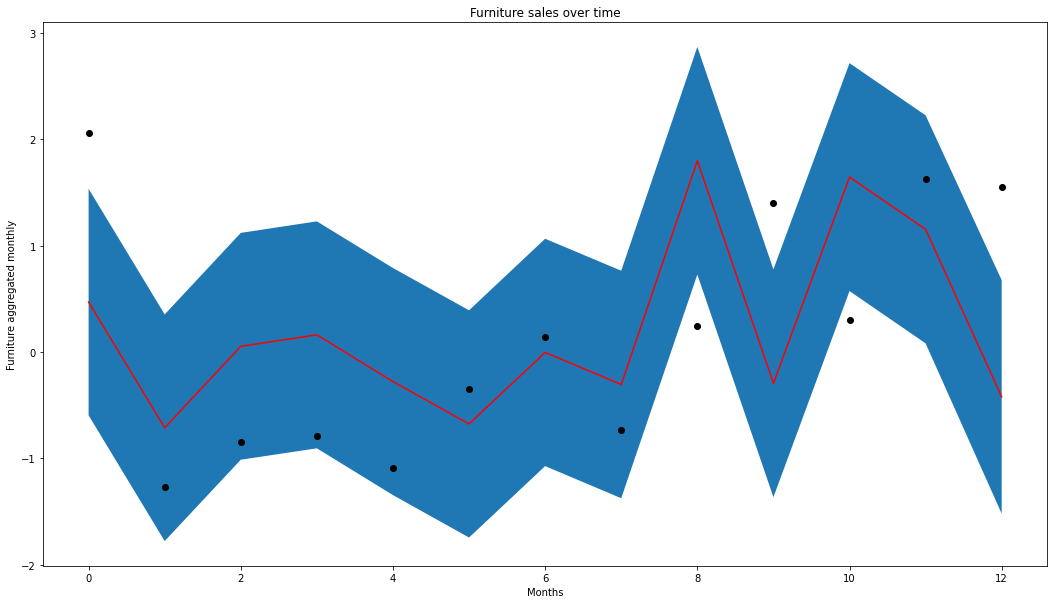

In [357]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,13),predictions,c='r')
plt.fill_between(np.arange(0,13),conf_int[:,0],conf_int[:,1])
plt.scatter(np.arange(0,13),yfs[35:48],c='0')
plt.title('Furniture sales over time')
plt.xlabel('Months')
plt.ylabel('Furniture aggregated monthly')

Text(0, 0.5, 'Overall sales aggregated monthly')

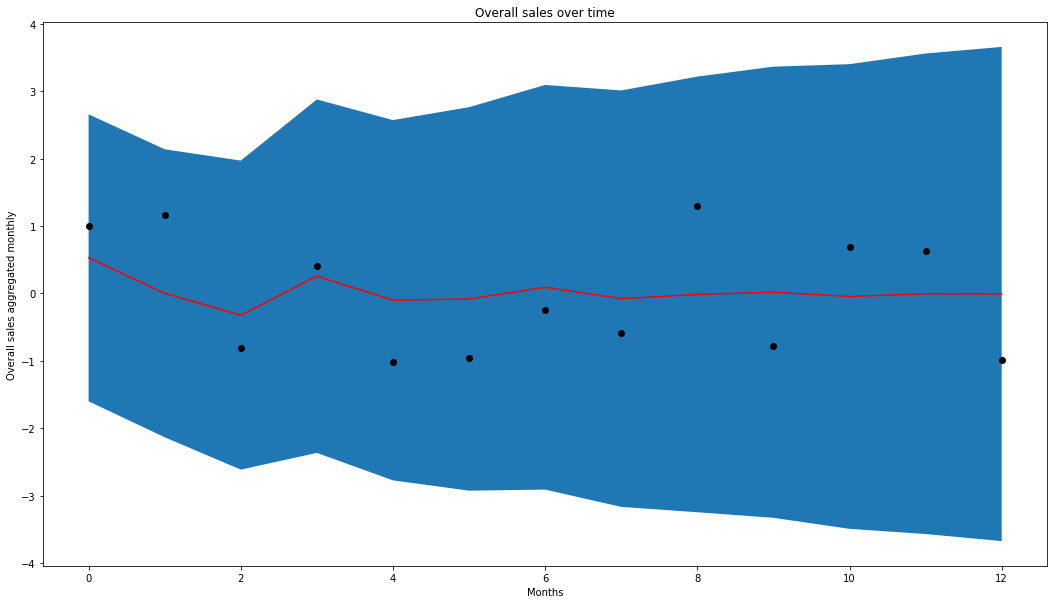

In [358]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,13),predictionsov,c='r')
plt.fill_between(np.arange(0,13),conf_intov[:,0],conf_intov[:,1])
plt.scatter(np.arange(0,13),yfoverall[35:48],c='0')

plt.title('Overall sales over time')
plt.xlabel('Months')
plt.ylabel('Overall sales aggregated monthly')

Text(0, 0.5, 'Overall sales aggregated monthly')

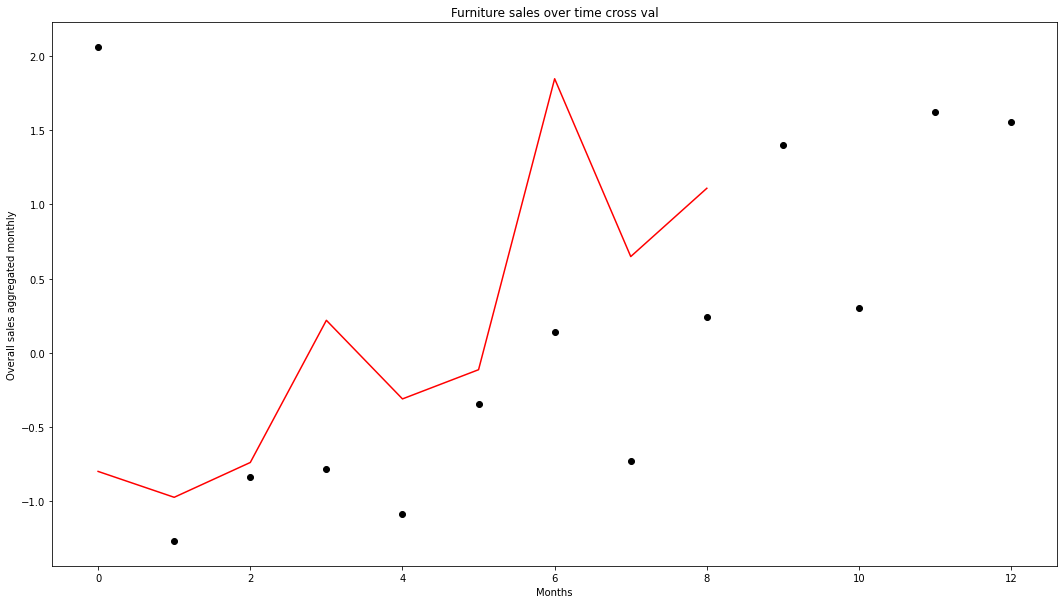

In [361]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,9),predictionscv,c='r')
#plt.fill_between(np.arange(0,13),conf_int[:,0],conf_int[:,1])
plt.scatter(np.arange(0,13),yfs[35:48],c='0')
plt.title('Furniture sales over time cross val')
plt.xlabel('Months')
plt.ylabel('Overall sales aggregated monthly')

Text(0, 0.5, 'Tech sales aggregated monthly')

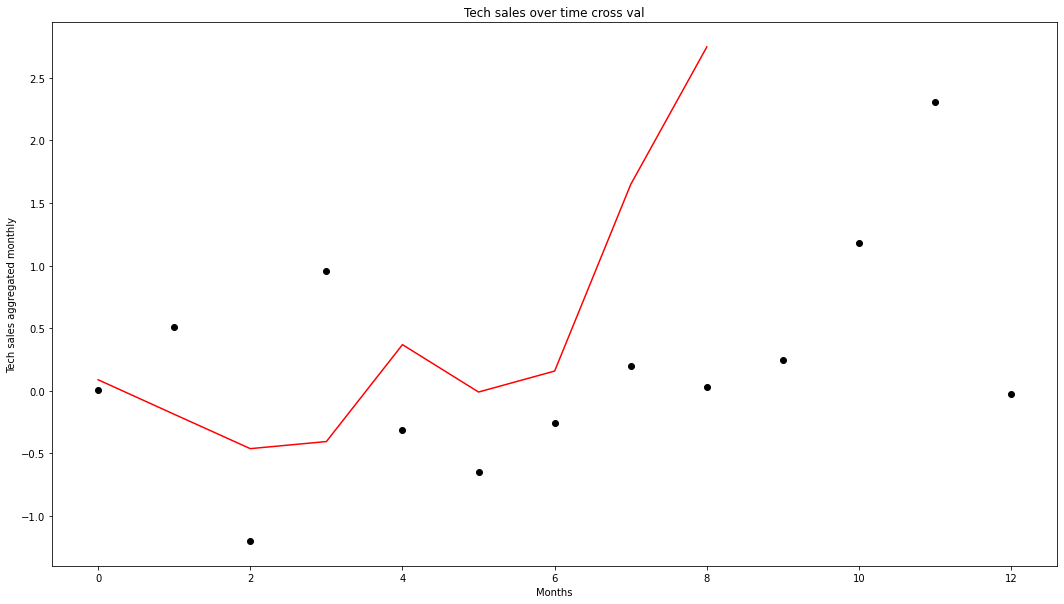

In [362]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,9),predictionscvt,c='r')
#plt.fill_between(np.arange(0,13),conf_int[:,0],conf_int[:,1])
plt.scatter(np.arange(0,13),yftech[35:48],c='0')
plt.title('Tech sales over time cross val')
plt.xlabel('Months')
plt.ylabel('Tech sales aggregated monthly')

Text(0, 0.5, 'Overall sales aggregated monthly')

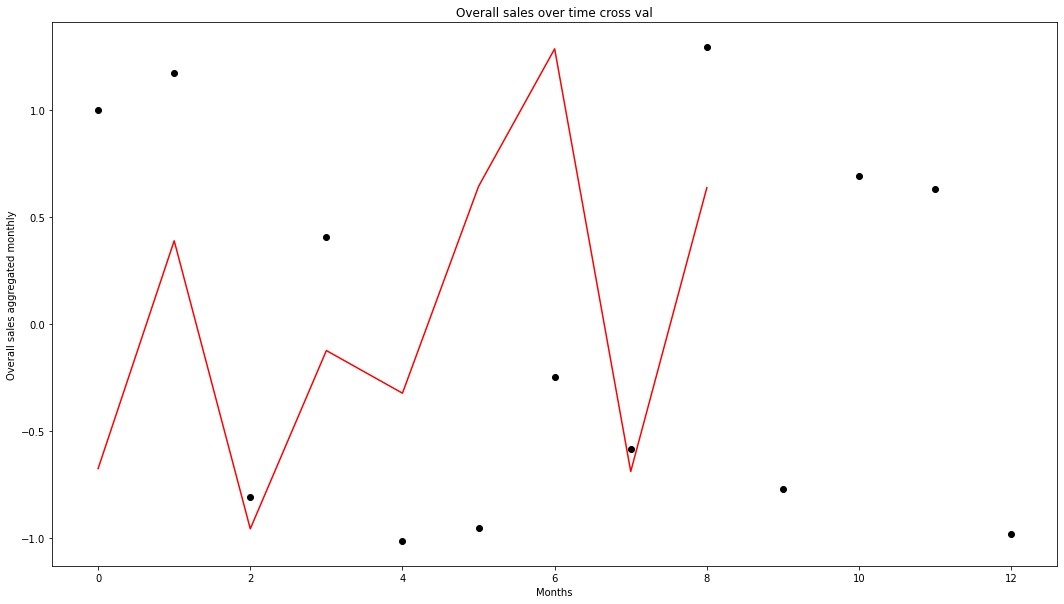

In [363]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,9),predictionscvov,c='r')
#plt.fill_between(np.arange(0,13),conf_int[:,0],conf_int[:,1])
plt.scatter(np.arange(0,13),yfoverall[35:48],c='0')
plt.title('Overall sales over time cross val')
plt.xlabel('Months')
plt.ylabel('Overall sales aggregated monthly')

Text(0, 0.5, 'Accessory profit aggregated monthly')

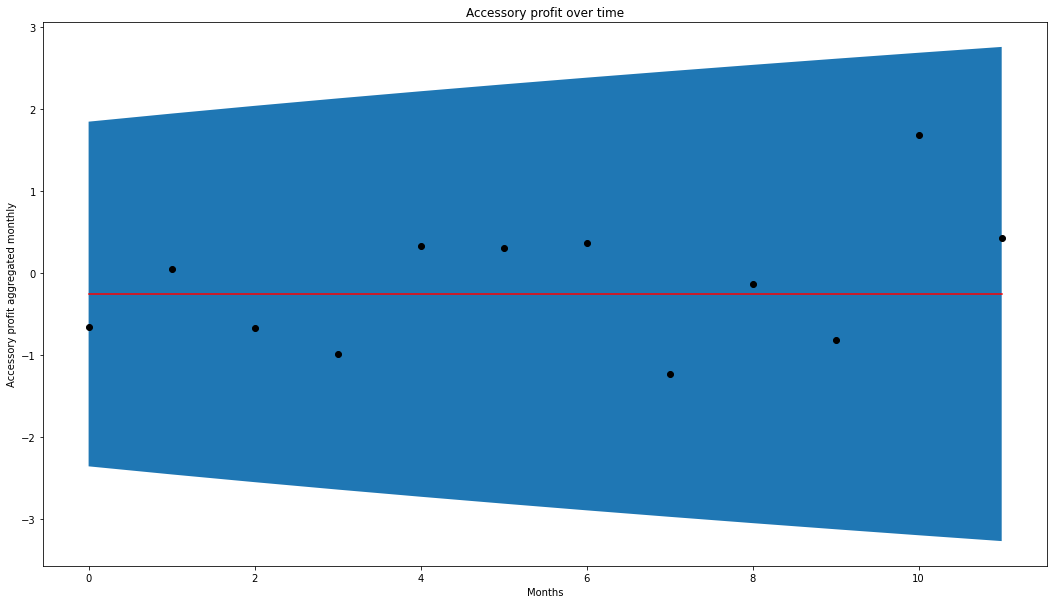

In [364]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot(np.arange(0,12),predictions2,c='r')
plt.fill_between(np.arange(0,12),conf_int2[:,0],conf_int2[:,1])
plt.scatter(np.arange(0,12),y_testa,c='0')
plt.title('Accessory profit over time')
plt.xlabel('Months')
plt.ylabel('Accessory profit aggregated monthly')

In [365]:
sms.diagnostic.het_breuschpagan(automodel.resid(),yfs.values[0:36].reshape(-1,1))
# for whatever reason this is returning an nan anyhow we can see from the sarimax summary that our model is not heteroskedstic

(8.800128556238942, nan, 11.323748353193457, 0.001868060035086998)

In [184]:
class HypothesisResidual():
    def __init__(self,resid,endog):
        self.resid=resid
        self.endog=endog
    
    def _shapirotest(self):
        self.resid=pd.DataFrame(self.resid)
        self.resid.plot(kind='kde')
        self.resid=self.resid.values
        shapirop=stats.shapiro(self.resid)[1]
        if shapirop > 0.05:
            print('Reiduals are normal with p value {}'.format(shapirop))
        else:
            print('Residuals are not normal with p value {}'.format(shapirop))
        
    
    def breushpagantest(self):
        brueschp=sms.diagnostic.het_breuschpagan(self.resid,self.endog)[1]
        if brueschp > 0.05:
            print('residuals are homoskedastic with p value {}'.format(brueschp))
        else:
            print('residuals are heteroskedastic with p value {}'.format(brueschp))
    def _durbinwatson(self):
        db=durbin_watson(self.resid)
        if (db > 1.5) & (db < 2.5):
            print('No serial autocorrelation in residuals')
        else:
             print('serial autocorrelation is present in residuals')

Reiduals are normal with p value 0.07063455879688263
No serial autocorrelation in residuals


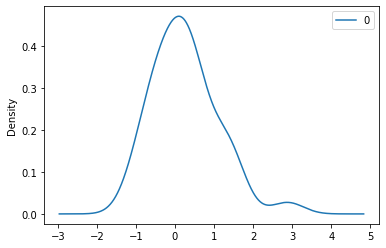

In [185]:
h=HypothesisResidual(automodel.resid(),yfs.values[0:36].reshape(-1,1))
h._shapirotest()
h._durbinwatson()

Residuals are not normal with p value 0.0038736865390092134
No serial autocorrelation in residuals


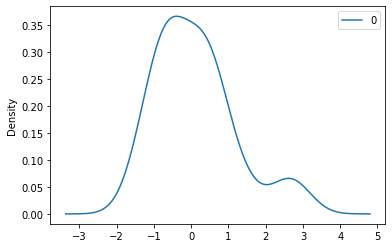

In [193]:
ht=HypothesisResidual(automodeltech.resid(),yftech.values[0:36].reshape(-1,1))
ht._shapirotest()
ht._durbinwatson()

Residuals are not normal with p value 0.002980476710945368
No serial autocorrelation in residuals


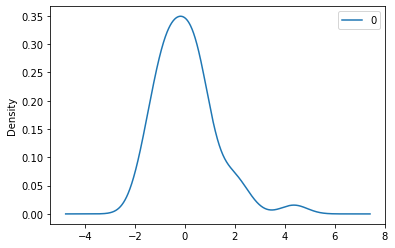

In [354]:
hov=HypothesisResidual(automodelov.resid(),yfoverall.values[0:36].reshape(-1,1))
hov._shapirotest()
hov._durbinwatson()

Residuals are not normal with p value 0.016377175226807594
No serial autocorrelation in residuals


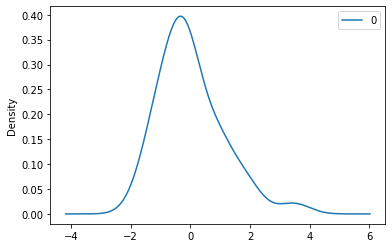

In [196]:
ha=HypothesisResidual(automodel2.resid(),ya.values[0:36].reshape(-1,1))
ha._shapirotest()
ha._durbinwatson()

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


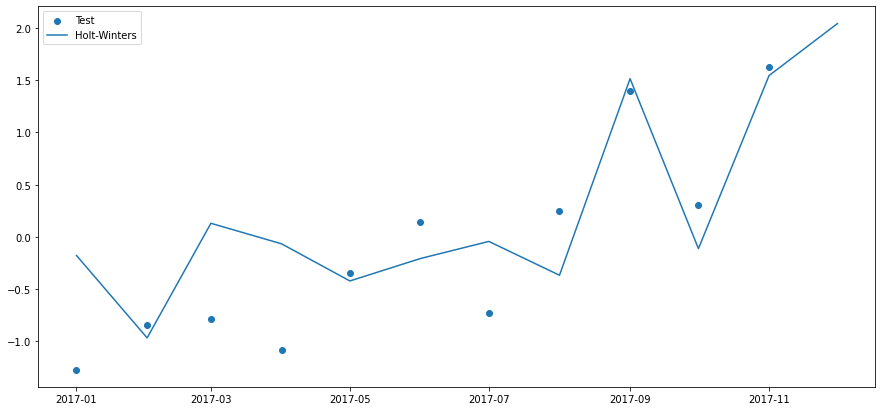

In [421]:
modele = ExponentialSmoothing(yfs[0:36], trend='add',seasonal='add').fit()
prede = modele.predict(start=yfs.index[36], end=yfs.index[-1])

predfig=plt.figure(figsize=(15,7))
plt.scatter(yfs.index[36:-1], yfs[36:-1], label='Test')
plt.plot(prede.index[0:], prede, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


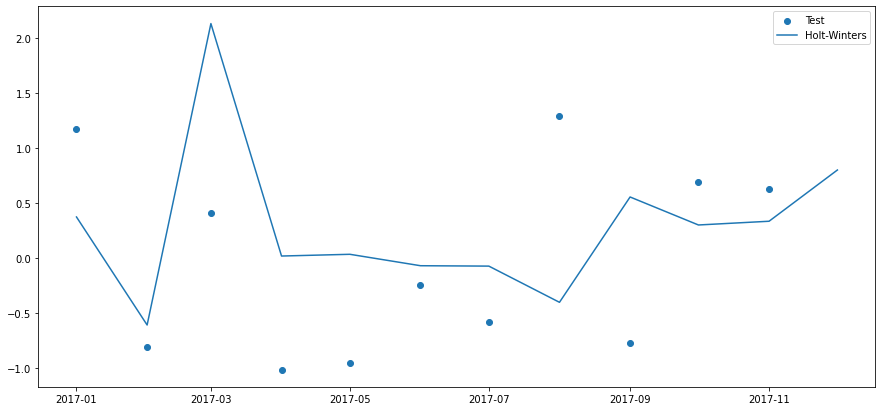

In [422]:
modelove = ExponentialSmoothing(yfoverall[0:36], trend='add',seasonal='add').fit()
predove = modelove.predict(start=yfoverall.index[36], end=yfoverall.index[-1])

predfig=plt.figure(figsize=(15,7))
plt.scatter(yfoverall.index[36:-1], yfoverall[36:-1], label='Test')
plt.plot(predove.index[0:], predove, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [372]:
m=Prophet(weekly_seasonality=False)
# add fourier order
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
newframe=pd.DataFrame()
newframe['ds']=yfs.index[0:36]
newframe['y']=yfs.values[0:36]
newframe['y']= newframe['y'].dropna()
m.fit(newframe)
future = m.make_future_dataframe(periods=13)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:39:40 - cmdstanpy - INFO - Chain [1] start processing
14:39:40 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
44,2016-12-10,-0.745920,-1.178605,-0.280783
45,2016-12-11,-6.779971,-7.226719,-6.295926
46,2016-12-12,-5.751983,-6.219871,-5.336915
47,2016-12-13,0.131427,-0.309354,0.573732
48,2016-12-14,4.637419,4.210376,5.100703


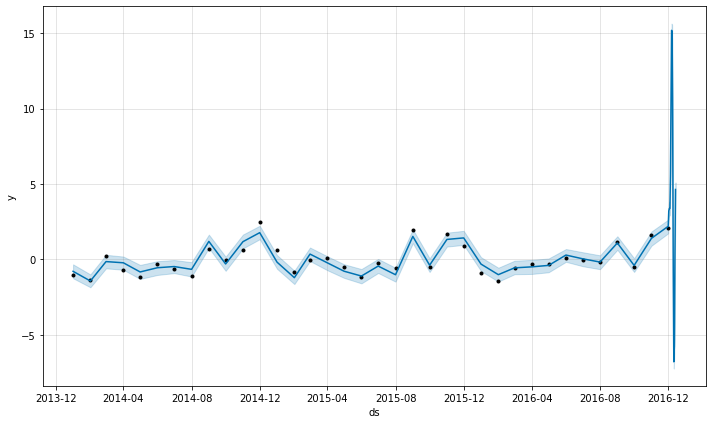

In [373]:
fig1 = m.plot(forecast)

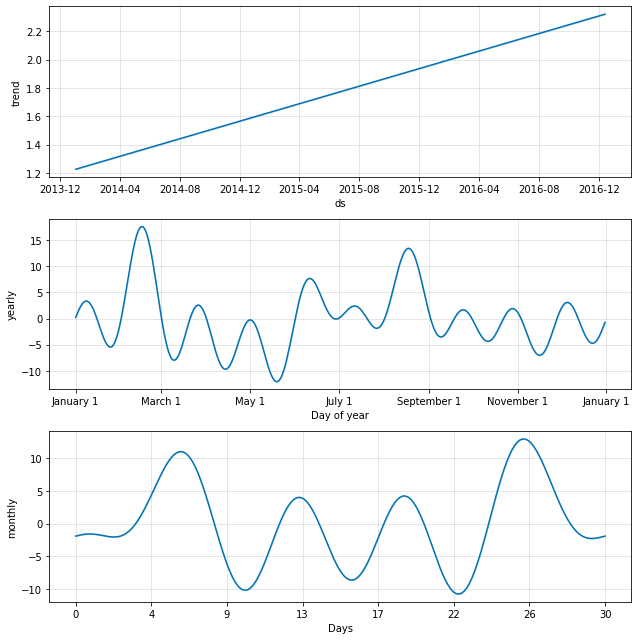

In [374]:
m.plot_components(forecast)
print()
# fore some reason the graph appears twice print() resolves this issue 
# https://stackoverflow.com/questions/58792264/why-is-jupyter-showing-charts-twice

In [375]:
m.params

OrderedDict([('lp__', array([[51.6878]])),
             ('k', array([[0.438454]])),
             ('m', array([[0.497819]])),
             ('delta',
              array([[-1.59041e-11,  2.82957e-11,  3.74387e-11,  7.07142e-11,
                       4.97627e-11,  4.67272e-11, -6.85237e-11, -8.97462e-11,
                       2.35586e-12,  4.71230e-11, -6.65474e-11, -1.07496e-10,
                       7.43325e-11,  3.90853e-11,  9.46237e-12,  5.02113e-11,
                      -5.61658e-11,  2.83939e-11, -3.91067e-11, -1.37034e-11,
                       5.35576e-11, -2.92221e-11,  1.96348e-11,  7.58918e-11,
                       6.24453e-12]])),
             ('sigma_obs', array([[0.143456]])),
             ('beta',
              array([[-0.973834 ,  0.792258 ,  0.504937 , -0.140067 ,  1.41162  ,
                       1.4133   , -0.170632 ,  1.57619  ,  1.53796  , -1.54431  ,
                      -0.403503 , -0.126866 ,  1.5918   ,  0.674954 ,  0.251541 ,
                      -0.50

Reiduals are normal with p value 0.10011142492294312
No serial autocorrelation in residuals


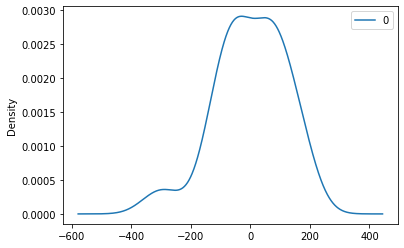

In [210]:
resproyfs=forecast['yhat'][0:36].values - yfs[0:36].values
hfs=HypothesisResidual(resproyfs.reshape(-1,1),yfs.values[0:36].reshape(-1,1))
hfs._shapirotest()
hfs._durbinwatson()

In [199]:
mt=Prophet()
newframet=pd.DataFrame()
newframet['ds']=yftech.index[0:36]
newframet['y']=yftech.values[0:36]
newframet['y']= newframet['y'].dropna()
mt.fit(newframet)
futuret = mt.make_future_dataframe(periods=13)
futuret.tail()
forecast2 = mt.predict(futuret)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

23:28:43 - cmdstanpy - INFO - Chain [1] start processing
23:28:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
44,2016-12-10,-4247.591395,-4604.680112,-3866.007755
45,2016-12-11,-4610.829357,-4977.161001,-4254.938292
46,2016-12-12,-4920.456379,-5238.951789,-4574.929421
47,2016-12-13,-5175.676216,-5550.490901,-4811.419059
48,2016-12-14,-5375.946772,-5728.294693,-5036.225373


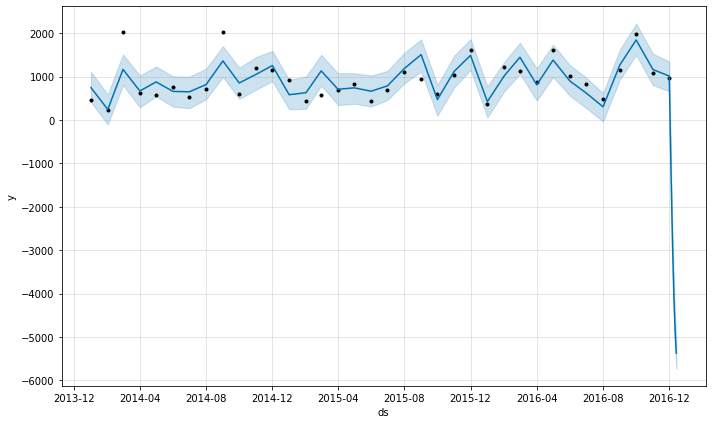

In [254]:
mt.plot(forecast2)
print()

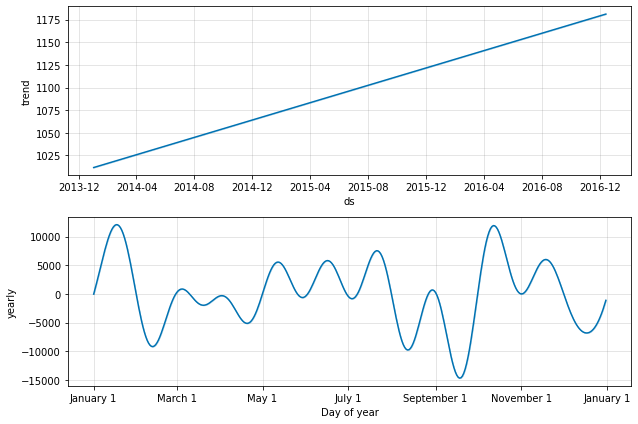

In [257]:
mt.plot_components(forecast2)
print()

Residuals are not normal with p value 0.02698277123272419
No serial autocorrelation in residuals


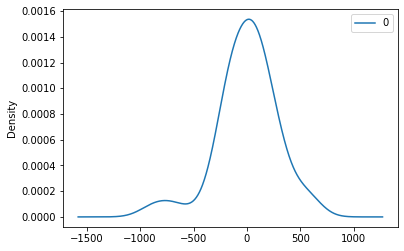

In [212]:
resprotech=forecast2['yhat'][0:36].values - yftech[0:36].values
hftech=HypothesisResidual(resprotech.reshape(-1,1),yftech.values[0:36].reshape(-1,1))
hftech._shapirotest()
hftech._durbinwatson()

In [229]:

cal = calendar()
train_holidays = cal.holidays(start=forecast2['ds'][0:36].min(),
                              end=forecast2['ds'][0:36].max())
test_holidays = cal.holidays(start=forecast2['ds'][36:48].min(),
                             end=forecast2['ds'][36:48].max())
holiday=pd.DataFrame()
holiday['ds']=pd.to_datetime(forecast2['ds'])

holiday['is_holiday'] = holiday.ds.isin([d.date() for d in cal.holidays()])
holiday_df = holiday.loc[holiday['is_holiday']] \
    .reset_index() \
    .rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'USFederalHoliday'
holiday_df = holiday_df.drop(['is_holiday'], axis=1)
holiday_df.head()

,index,ds,holiday
0,0,2014-01-01,USFederalHoliday
1,8,2014-09-01,USFederalHoliday
2,12,2015-01-01,USFederalHoliday
3,24,2016-01-01,USFederalHoliday


In [230]:
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(newframet[['ds','y']][0:36])

00:07:11 - cmdstanpy - INFO - Chain [1] start processing
00:07:11 - cmdstanpy - INFO - Chain [1] done processing


In [234]:
holiday = model_with_holidays.predict(futuret)

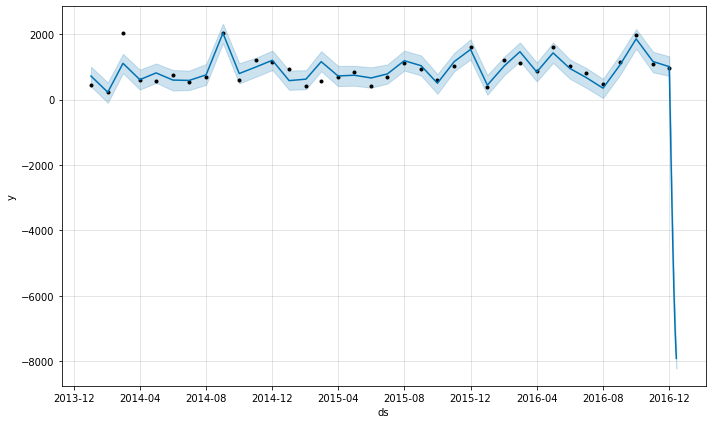

In [255]:
model_with_holidays.plot(holiday)
print()

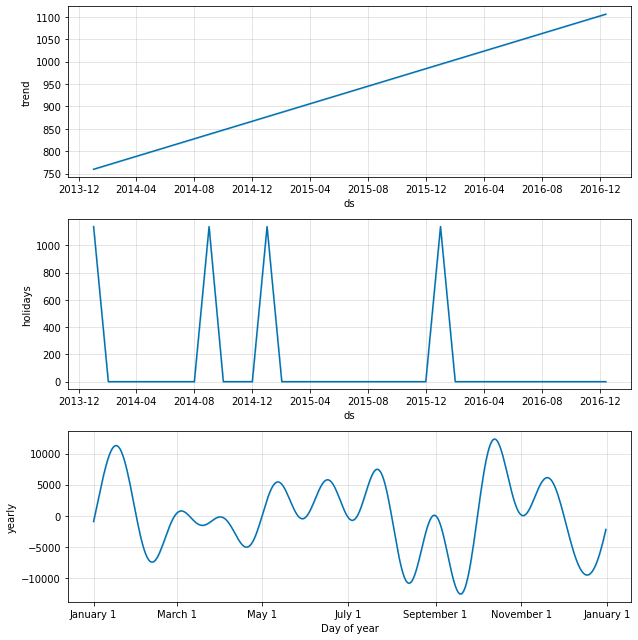

In [256]:
model_with_holidays.plot_components(holiday)
print()

In [366]:
mo=Prophet()
newframeo=pd.DataFrame()
newframeo['ds']=yfoverall.index[0:36]
newframeo['y']=yfoverall.values[0:36]
newframeo['y']= newframeo['y'].dropna()
mo.fit(newframeo)
futureo = mo.make_future_dataframe(periods=13)
futureo.tail()
forecasto = mo.predict(futureo)
forecasto[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

14:12:27 - cmdstanpy - INFO - Chain [1] start processing
14:12:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
44,2016-12-10,15.755179,15.038600,16.544090
45,2016-12-11,16.592446,15.877820,17.358596
46,2016-12-12,17.158777,16.444957,17.918678
47,2016-12-13,17.439171,16.661112,18.145997
48,2016-12-14,17.426356,16.633510,18.149198


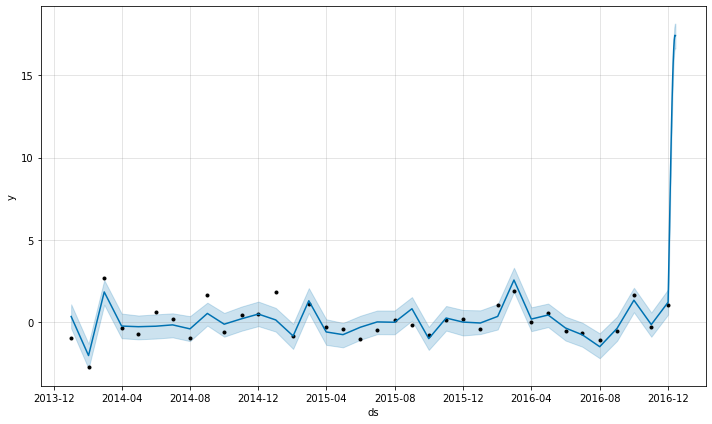

In [368]:
mo.plot(forecasto)
print()

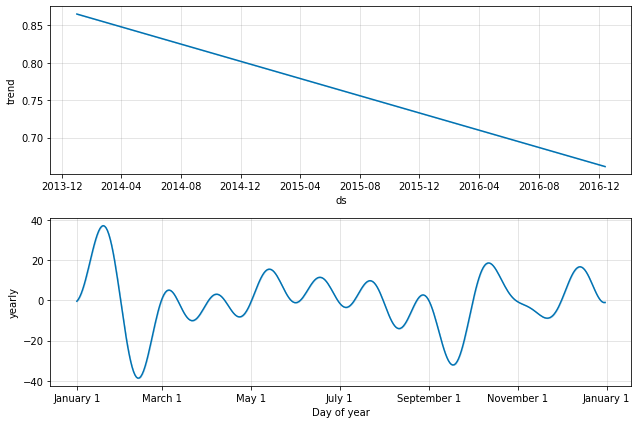

In [370]:
mo.plot_components(forecasto)
print()

# Clustering

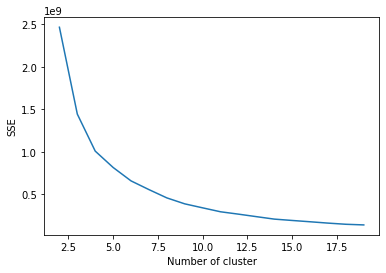

In [634]:
# from above I will guess k=4
from sklearn.cluster import KMeans
sse={}
plot=np.zeros(18)
for e in range(2,20):
    k=KMeans(n_clusters=e)
    k.fit(superstore[['Sales','Profit']])
    sse[e]=(k.inertia_)
plt.figure()

plt.plot(range(2,20), sse.values())
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


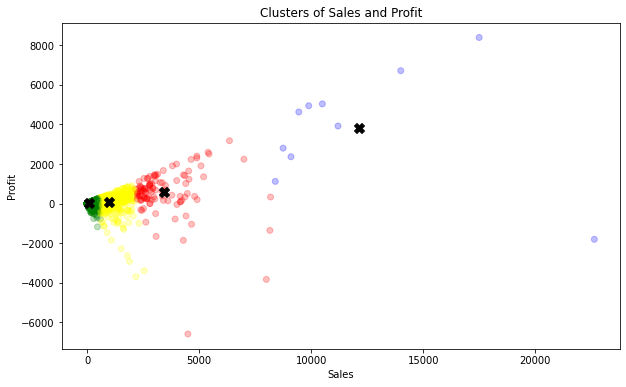

In [738]:
km=KMeans(n_clusters=4).fit(superstore[['Sales','Profit']])
kmeans_colors = ['green' if c == 0 else 'red' if c == 2 else 'yellow' if c == 3 else 'blue' for c in km.labels_]
superstore["clusters"]=km.labels_
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Sales",y="Profit", data=superstore[['Sales','Profit']],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Sales and Profit")
plt.show()


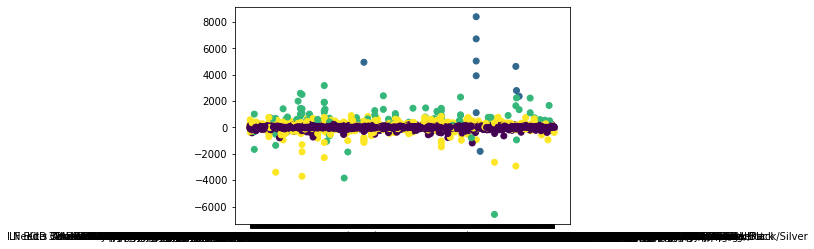

In [694]:
plt.scatter(superstore['Product Name'],superstore['Profit'],c=superstore['clusters'])

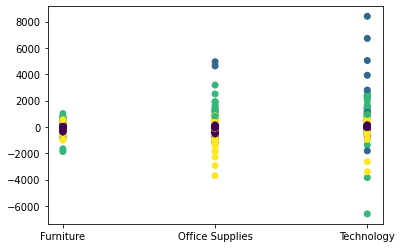

In [695]:
plt.scatter(superstore['Category'],superstore['Profit'],c=superstore['clusters'])

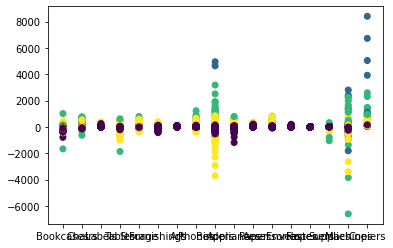

In [696]:
plt.scatter(superstore['Sub-Category'],superstore['Profit'],c=superstore['clusters'])

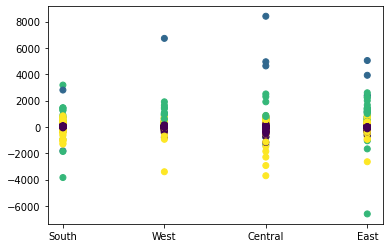

In [698]:
plt.scatter(superstore['Region'],superstore['Profit'],c=superstore['clusters'])

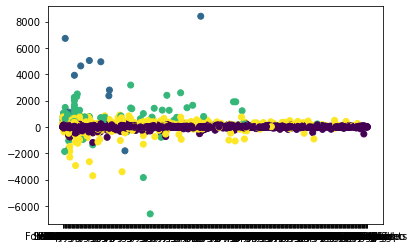

In [699]:
plt.scatter(superstore['City'],superstore['Profit'],c=superstore['clusters'])

In [735]:
pd.get_dummies(Xcl)

,Profit,Category_Furniture,Category_Office Supplies,Category_Technology
0,41.9136,1,0,0
1,219.5820,1,0,0
2,6.8714,0,1,0
3,-383.0310,1,0,0
4,2.5164,0,1,0
...,...,...,...,...
9989,4.1028,1,0,0
9990,15.6332,1,0,0
9991,19.3932,0,0,1
9992,13.3200,0,1,0


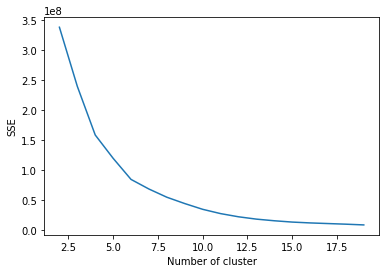

In [21]:
# from above I will guess k=4

sset={}
plot=np.zeros(18)
for e in range(2,20):
    kt=KMeans(n_clusters=e)
    kt.fit(pd.get_dummies(superstore[['Category','Profit']]))
    sset[e]=(kt.inertia_)
plt.figure()

plt.plot(range(2,20), sset.values())
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



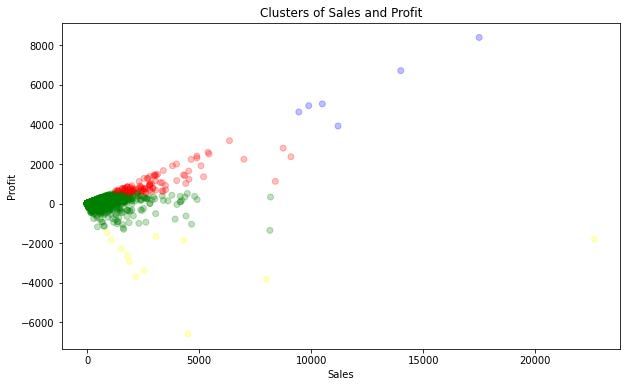

In [22]:
ke=KMeans(n_clusters=4).fit(pd.get_dummies(superstore[['Category','Profit']]))
kmeans_colore = ['green' if c == 0 else 'red' if c == 2 else 'yellow' if c == 3 else 'blue' for c in ke.labels_]
superstore["clusters"]=ke.labels_
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Sales",y="Profit", data=(superstore[['Sales','Profit']]),
            alpha=0.25,color = kmeans_colore)

plt.xlabel("Sales")
plt.ylabel("Profit")
#plt.scatter(x=ke.cluster_centers_[:,0],y=ke.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Sales and Profit")
plt.show()



In [23]:
superstore[['clusters','Category','Profit']].sort_values(by='Profit',ascending=False)

,clusters,Category,Profit
6826,1,Technology,8399.9760
8153,1,Technology,6719.9808
4190,1,Technology,5039.9856
9039,1,Office Supplies,4946.3700
4098,1,Office Supplies,4630.4755
...,...,...,...
4991,3,Office Supplies,-2929.4845
3011,3,Technology,-3399.9800
9774,3,Office Supplies,-3701.8928
683,3,Technology,-3839.9904


# Classifying the clusters based upon cluster features anayzing the feature importance
# Importance of category and profit

In [24]:
Xcl=superstore[['Category','Profit']]
ycl=superstore['clusters']
X_traincl, X_testcl, y_traincl, y_testcl = train_test_split(pd.get_dummies(Xcl), ycl, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_traincl, y_traincl)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

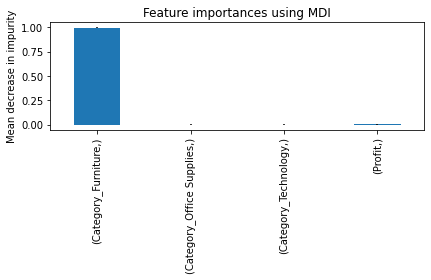

In [733]:
forest_importances = pd.Series(importances, index=[['Category_Furniture','Category_Office Supplies','Category_Technology','Profit']])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

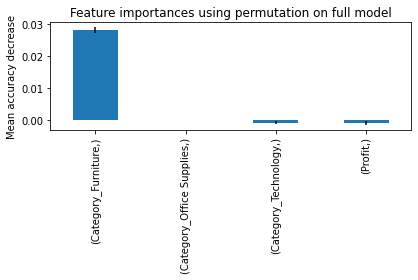

In [737]:
result = permutation_importance(
    forest, X_testcl, y_testcl, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=[['Category_Furniture','Category_Office Supplies','Category_Technology','Profit']])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Feature importance of Sales and Profit

In [739]:
# of course I used the clustering based upon sales and profit
Xclt=superstore[['Sales','Profit']]
yclt=superstore['clusters']
X_trainclt, X_testclt, y_trainclt, y_testclt = train_test_split((Xclt), yclt, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_trainclt, y_trainclt)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

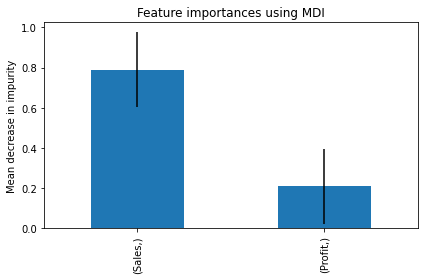

In [741]:
forest_importances = pd.Series(importances, index=[['Sales','Profit']])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

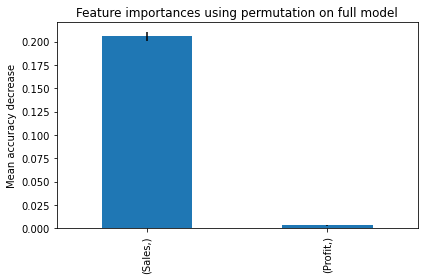

In [742]:
result = permutation_importance(
    forest, X_testclt, y_testclt, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=[['Sales','Profit']])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

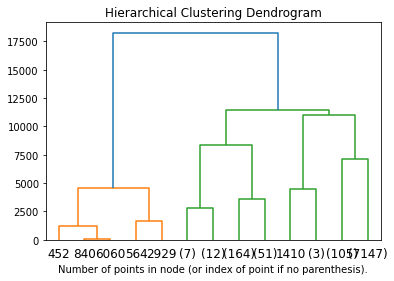

In [25]:
# from sklearn docs
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
modelclu = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

modelclu = modelclu.fit(X_traincl)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(modelclu, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [300]:
superstore['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [386]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [394]:
superstore['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [405]:
cleanup_nums = {"Segment":     {"Consumer": 0, "Corporate": 1, "Home Office":2},
                "Country": {"United States": 0 },
                "Category": {"Furniture": 0,"Office Supplies": 1, "Technology": 2},
                "Sub-Category": {"Bookcases": 0,"Chairs": 1, "Labels": 2,"Tables": 3,"Storage": 4,"Furnishings": 5,"Art": 6,"Phones": 7,"Binders": 8,"Appliances":9,"Paper": 10,
                "Accessories": 1,"Envelopes": 12,"Fasteners": 13,"Supplies": 14,"Machines": 15,"Copiers": 16},
                "Ship Mode": {"Second Class": 0, "Standard Class": 1,"First Class": 2,"Same Day": 3  },
                "Region" : {"South" : 0 , "West": 1, "Central": 2, "East":3}
               }

In [406]:
replacedstore = superstore.replace(cleanup_nums)
replacedstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,clusters
0,1,CA-2016-152156,2016-11-08,2016-11-11,0,CG-12520,Claire Gute,0,0,Henderson,...,0,FUR-BO-10001798,0,0,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0
1,2,CA-2016-152156,2016-11-08,2016-11-11,0,CG-12520,Claire Gute,0,0,Henderson,...,0,FUR-CH-10000454,0,1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0
2,3,CA-2016-138688,2016-06-12,2016-06-16,0,DV-13045,Darrin Van Huff,1,0,Los Angeles,...,1,OFF-LA-10000240,1,2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0
3,4,US-2015-108966,2015-10-11,2015-10-18,1,SO-20335,Sean O'Donnell,0,0,Fort Lauderdale,...,0,FUR-TA-10000577,0,3,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,5,US-2015-108966,2015-10-11,2015-10-18,1,SO-20335,Sean O'Donnell,0,0,Fort Lauderdale,...,0,OFF-ST-10000760,1,4,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0


In [408]:
replacedstore=replacedstore.drop(["Order Date","Order ID","Customer ID", "Country", "City","Product ID", "Ship Date","Product Name"],axis=1)


In [409]:
replacedstore=replacedstore.drop(["Row ID","Customer Name","State","Postal Code"],axis=1)
replacedstore

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,clusters
0,0,0,0,0,0,261.9600,2,0.00,41.9136,0
1,0,0,0,0,1,731.9400,3,0.00,219.5820,0
2,0,1,1,1,2,14.6200,2,0.00,6.8714,0
3,1,0,0,0,3,957.5775,5,0.45,-383.0310,0
4,1,0,0,1,4,22.3680,2,0.20,2.5164,0
...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,5,25.2480,3,0.20,4.1028,0
9990,1,0,1,0,5,91.9600,2,0.00,15.6332,0
9991,1,0,1,2,7,258.5760,2,0.20,19.3932,0
9992,1,0,1,1,10,29.6000,4,0.00,13.3200,0


In [410]:
replacedstore=replacedstore.drop("clusters",axis=1)

In [411]:
replacedstore

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,0,0,0,0,261.9600,2,0.00,41.9136
1,0,0,0,0,1,731.9400,3,0.00,219.5820
2,0,1,1,1,2,14.6200,2,0.00,6.8714
3,1,0,0,0,3,957.5775,5,0.45,-383.0310
4,1,0,0,1,4,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,5,25.2480,3,0.20,4.1028
9990,1,0,1,0,5,91.9600,2,0.00,15.6332
9991,1,0,1,2,7,258.5760,2,0.20,19.3932
9992,1,0,1,1,10,29.6000,4,0.00,13.3200


In [436]:
np.where(replacedstore.corr()['Ship Mode']==replacedstore.corr()['Ship Mode'].max())
replacedstore.corr()['Ship Mode'].index[0] 

'Ship Mode'

In [434]:
re=pd.read_csv('returnsant.csv',usecols=[1])
re

,Hedge Fund
0,0.0088
1,0.0083
2,0.0242
3,0.0146
4,-0.0325
...,...
190,-0.0099
191,-0.0172
192,-0.0787
193,-0.0222


In [413]:
sct=StandardScaler()
scaledstore= sct.fit_transform(replacedstore)
pca=PCA()
X_pca = pca.fit_transform(scaledstore)
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_t = pd.DataFrame(
    pca.components_.T,
    columns = [f"PC{i+1}" for i in range(X_pca.shape[1])],
    index=replacedstore.columns
    )
X_pca_t


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Ship Mode,-0.020039,-0.063930,0.181448,0.696087,0.184080,0.640459,-0.182104,-0.026971,0.009345
Segment,0.041016,-0.058792,-0.016478,0.318155,-0.939897,-0.052100,0.076902,0.036143,-0.005044
Region,-0.040698,-0.058725,0.469361,0.397638,0.138600,-0.703373,-0.306397,-0.090093,0.023234
Category,0.198609,-0.657072,-0.074553,-0.077787,0.028673,-0.011355,-0.272584,0.664752,-0.007327
Sub-Category,0.096036,-0.693512,0.149954,-0.154952,-0.025223,0.080906,0.150677,-0.650106,0.103910
Sales,0.617534,0.170591,0.247846,0.013305,0.039832,0.014923,0.276777,0.132746,0.657198
Quantity,0.267878,0.209567,0.409626,-0.416185,-0.218483,0.246596,-0.629247,-0.121745,-0.154924
Discount,-0.274430,-0.046655,0.695501,-0.159316,-0.029196,0.127319,0.491604,0.297417,-0.257321
Profit,0.647435,0.033293,-0.074288,0.165209,0.108929,-0.091904,0.236235,-0.066452,-0.682914


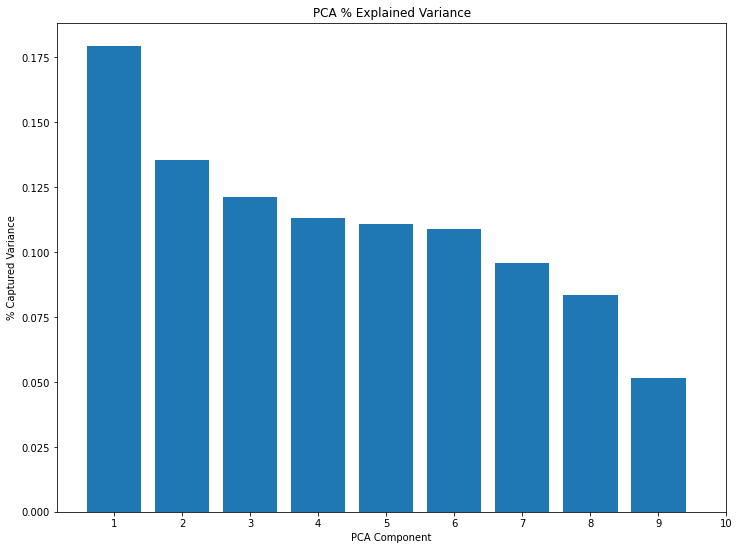

In [414]:
plt.figure(figsize=(12,9))
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
plt.bar(grid, evr)
plt.title('PCA % Explained Variance')
plt.xticks(range(1,11))
plt.xlabel('PCA Component')
plt.ylabel('% Captured Variance')
plt.show()

In [426]:
vif_data = pd.DataFrame()
vif_data["feature"] = replacedstore.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(scaledstore, i)
                          for i in range(len(replacedstore.columns))]
  
print(vif_data)

        feature       VIF
0     Ship Mode  1.001609
1       Segment  1.000818
2        Region  1.005392
3      Category  1.064036
4  Sub-Category  1.063009
5         Sales  1.361007
6      Quantity  1.044416
7      Discount  1.074673
8        Profit  1.388130


# Probability of first class delivery being greater than 3 days Poisson process

In [302]:
standard=superstore[superstore['Ship Mode']=='First Class']
intershiparrival= standard['Ship Date']- standard['Order Date'] 
intershiparrival

35     2 days
36     2 days
44     2 days
45     2 days
55     1 days
        ...  
9927   3 days
9933   3 days
9961   3 days
9962   3 days
9981   3 days
Length: 1538, dtype: timedelta64[ns]

In [316]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
class Poisson():
    def __init__(self,df):
        self.df=df
    def mean(self):
        self.means=np.mean(self.df)
        return self.means
    def prob(self,x):
        print(self.means)
        return poisson.cdf(x,self.means)
    def mass(self,x):
        return poisson.pmf(x,self.means)
poi=Poisson(intershiparrival.dt.days.values)   

In [320]:
(1 - poi.prob(3))

2.182704811443433


0.17725745242545454